In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcY29jYWRccHJvamV0b3NcbWluZXJhY2FvX2RlX2RhZG9zXGF0aXZpZGFkZV8y'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

C:\Users\cocad\AppData\Local\Temp\ipykernel_6180\2849764531.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\importlib\\_bootstrap.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\importlib\\_bootstrap_external.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\codecs.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\encodings\\aliases.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\encodings\\__init__.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\encodings\\utf_8.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\encodings\\cp1252.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\abc.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\io.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\stat.py": 1692881185.0, "C:\\Users\\cocad\\miniconda3\\envs\\tensorflow_env\\lib\\_collections_abc.py": 169

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Carregar o conjunto de dados MNIST
data = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

# 2. Normalizar os dados (0-255 -> 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. Definir a arquitetura da rede neural
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Achatar imagens 28x28 para vetor 784
    keras.layers.Dense(128, activation='relu'),  # Camada oculta com 128 neurônios
    keras.layers.Dense(10, activation='softmax') # Camada de saída para 10 classes
])

# 4. Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [3]:
# 5. Treinar o modelo
epochs = 20  # Número de épocas
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

# 6. Avaliação no conjunto de teste
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Perda: {loss:.4f}, Acurácia: {accuracy:.4f}')

Epoch 1/20


   1/1875 [..............................] - ETA: 17:32 - loss: 2.2669 - accuracy: 0.1562

  29/1875 [..............................] - ETA: 3s - loss: 1.5576 - accuracy: 0.5700   

  58/1875 [..............................] - ETA: 3s - loss: 1.1427 - accuracy: 0.6918

  88/1875 [>.............................] - ETA: 3s - loss: 0.9407 - accuracy: 0.7401

 118/1875 [>.............................] - ETA: 3s - loss: 0.8178 - accuracy: 0.7725

 148/1875 [=>............................] - ETA: 3s - loss: 0.7425 - accuracy: 0.7952

 177/1875 [=>............................] - ETA: 2s - loss: 0.6807 - accuracy: 0.8109

 207/1875 [==>...........................] - ETA: 2s - loss: 0.6380 - accuracy: 0.8237

 237/1875 [==>...........................] - ETA: 2s - loss: 0.6015 - accuracy: 0.8335

 268/1875 [===>..........................] - ETA: 2s - loss: 0.5676 - accuracy: 0.8425

 297/1875 [===>..........................] - ETA: 2s - loss: 0.5446 - accuracy: 0.8490

 328/1875 [====>.........................] - ETA: 2s - loss: 0.5229 - accuracy: 0.8551

 357/1875 [====>.........................] - ETA: 2s - loss: 0.5028 - accuracy: 0.8610

 387/1875 [=====>........................] - ETA: 2s - loss: 0.4882 - accuracy: 0.8643

 417/1875 [=====>........................] - ETA: 2s - loss: 0.4731 - accuracy: 0.8687

 447/1875 [======>.......................] - ETA: 2s - loss: 0.4614 - accuracy: 0.8721

 477/1875 [======>.......................] - ETA: 2s - loss: 0.4486 - accuracy: 0.8754

 507/1875 [=======>......................] - ETA: 2s - loss: 0.4356 - accuracy: 0.8789

 538/1875 [=======>......................] - ETA: 2s - loss: 0.4255 - accuracy: 0.8813

 568/1875 [========>.....................] - ETA: 2s - loss: 0.4186 - accuracy: 0.8831

 598/1875 [========>.....................] - ETA: 2s - loss: 0.4093 - accuracy: 0.8854

 628/1875 [=========>....................] - ETA: 2s - loss: 0.4019 - accuracy: 0.8872

 657/1875 [=========>....................] - ETA: 2s - loss: 0.3951 - accuracy: 0.8891

 686/1875 [=========>....................] - ETA: 2s - loss: 0.3886 - accuracy: 0.8904

 715/1875 [==========>...................] - ETA: 1s - loss: 0.3827 - accuracy: 0.8921

 745/1875 [==========>...................] - ETA: 1s - loss: 0.3769 - accuracy: 0.8938

 774/1875 [===========>..................] - ETA: 1s - loss: 0.3709 - accuracy: 0.8952

 804/1875 [===========>..................] - ETA: 1s - loss: 0.3642 - accuracy: 0.8973

 833/1875 [============>.................] - ETA: 1s - loss: 0.3589 - accuracy: 0.8988

 863/1875 [============>.................] - ETA: 1s - loss: 0.3540 - accuracy: 0.8998

 892/1875 [=============>................] - ETA: 1s - loss: 0.3500 - accuracy: 0.9009

 922/1875 [=============>................] - ETA: 1s - loss: 0.3455 - accuracy: 0.9020

 952/1875 [==============>...............] - ETA: 1s - loss: 0.3407 - accuracy: 0.9036

 982/1875 [==============>...............] - ETA: 1s - loss: 0.3357 - accuracy: 0.9051

1012/1875 [===============>..............] - ETA: 1s - loss: 0.3311 - accuracy: 0.9062

1043/1875 [===============>..............] - ETA: 1s - loss: 0.3273 - accuracy: 0.9075

1073/1875 [================>.............] - ETA: 1s - loss: 0.3232 - accuracy: 0.9085

1104/1875 [================>.............] - ETA: 1s - loss: 0.3195 - accuracy: 0.9096

1135/1875 [=================>............] - ETA: 1s - loss: 0.3170 - accuracy: 0.9102

1165/1875 [=================>............] - ETA: 1s - loss: 0.3141 - accuracy: 0.9109

1195/1875 [==================>...........] - ETA: 1s - loss: 0.3108 - accuracy: 0.9117

1225/1875 [==================>...........] - ETA: 1s - loss: 0.3078 - accuracy: 0.9125

1254/1875 [===================>..........] - ETA: 1s - loss: 0.3048 - accuracy: 0.9132

1284/1875 [===================>..........] - ETA: 1s - loss: 0.3018 - accuracy: 0.9140

1314/1875 [====================>.........] - ETA: 0s - loss: 0.2981 - accuracy: 0.9150

1343/1875 [====================>.........] - ETA: 0s - loss: 0.2955 - accuracy: 0.9158

1373/1875 [====================>.........] - ETA: 0s - loss: 0.2924 - accuracy: 0.9167

1403/1875 [=====================>........] - ETA: 0s - loss: 0.2895 - accuracy: 0.9176

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2875 - accuracy: 0.9180

1464/1875 [======================>.......] - ETA: 0s - loss: 0.2850 - accuracy: 0.9188

1494/1875 [======================>.......] - ETA: 0s - loss: 0.2824 - accuracy: 0.9194

1524/1875 [=======================>......] - ETA: 0s - loss: 0.2803 - accuracy: 0.9199

1552/1875 [=======================>......] - ETA: 0s - loss: 0.2788 - accuracy: 0.9204

1582/1875 [========================>.....] - ETA: 0s - loss: 0.2763 - accuracy: 0.9211

1612/1875 [========================>.....] - ETA: 0s - loss: 0.2746 - accuracy: 0.9217

1642/1875 [=========================>....] - ETA: 0s - loss: 0.2723 - accuracy: 0.9226

1671/1875 [=========================>....] - ETA: 0s - loss: 0.2704 - accuracy: 0.9230

1701/1875 [==========================>...] - ETA: 0s - loss: 0.2684 - accuracy: 0.9235

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2667 - accuracy: 0.9240

1761/1875 [===========================>..] - ETA: 0s - loss: 0.2649 - accuracy: 0.9244

1791/1875 [===========================>..] - ETA: 0s - loss: 0.2627 - accuracy: 0.9250

1821/1875 [============================>.] - ETA: 0s - loss: 0.2604 - accuracy: 0.9257

1850/1875 [============================>.] - ETA: 0s - loss: 0.2584 - accuracy: 0.9262

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9265 - val_loss: 0.1434 - val_accuracy: 0.9574


Epoch 2/20


   1/1875 [..............................] - ETA: 3s - loss: 0.2333 - accuracy: 0.9062

  32/1875 [..............................] - ETA: 3s - loss: 0.1457 - accuracy: 0.9531

  62/1875 [..............................] - ETA: 3s - loss: 0.1468 - accuracy: 0.9541

  92/1875 [>.............................] - ETA: 3s - loss: 0.1373 - accuracy: 0.9565

 123/1875 [>.............................] - ETA: 2s - loss: 0.1373 - accuracy: 0.9599

 153/1875 [=>............................] - ETA: 2s - loss: 0.1351 - accuracy: 0.9604

 183/1875 [=>............................] - ETA: 2s - loss: 0.1338 - accuracy: 0.9606

 213/1875 [==>...........................] - ETA: 2s - loss: 0.1333 - accuracy: 0.9604

 244/1875 [==>...........................] - ETA: 2s - loss: 0.1305 - accuracy: 0.9618

 275/1875 [===>..........................] - ETA: 2s - loss: 0.1293 - accuracy: 0.9626

 305/1875 [===>..........................] - ETA: 2s - loss: 0.1290 - accuracy: 0.9631

 336/1875 [====>.........................] - ETA: 2s - loss: 0.1278 - accuracy: 0.9637

 367/1875 [====>.........................] - ETA: 2s - loss: 0.1272 - accuracy: 0.9643

 397/1875 [=====>........................] - ETA: 2s - loss: 0.1272 - accuracy: 0.9645

 426/1875 [=====>........................] - ETA: 2s - loss: 0.1278 - accuracy: 0.9640

 456/1875 [======>.......................] - ETA: 2s - loss: 0.1276 - accuracy: 0.9640

 487/1875 [======>.......................] - ETA: 2s - loss: 0.1286 - accuracy: 0.9631

 518/1875 [=======>......................] - ETA: 2s - loss: 0.1299 - accuracy: 0.9627

 549/1875 [=======>......................] - ETA: 2s - loss: 0.1310 - accuracy: 0.9621

 579/1875 [========>.....................] - ETA: 2s - loss: 0.1297 - accuracy: 0.9624

 610/1875 [========>.....................] - ETA: 2s - loss: 0.1284 - accuracy: 0.9626

 640/1875 [=========>....................] - ETA: 2s - loss: 0.1268 - accuracy: 0.9628

 670/1875 [=========>....................] - ETA: 2s - loss: 0.1269 - accuracy: 0.9630

 699/1875 [==========>...................] - ETA: 1s - loss: 0.1265 - accuracy: 0.9631

 729/1875 [==========>...................] - ETA: 1s - loss: 0.1267 - accuracy: 0.9630

 758/1875 [===========>..................] - ETA: 1s - loss: 0.1259 - accuracy: 0.9632

 788/1875 [===========>..................] - ETA: 1s - loss: 0.1256 - accuracy: 0.9634

 818/1875 [============>.................] - ETA: 1s - loss: 0.1245 - accuracy: 0.9637

 847/1875 [============>.................] - ETA: 1s - loss: 0.1247 - accuracy: 0.9637

 877/1875 [=============>................] - ETA: 1s - loss: 0.1241 - accuracy: 0.9637

 906/1875 [=============>................] - ETA: 1s - loss: 0.1233 - accuracy: 0.9640

 936/1875 [=============>................] - ETA: 1s - loss: 0.1221 - accuracy: 0.9644

 965/1875 [==============>...............] - ETA: 1s - loss: 0.1226 - accuracy: 0.9643

 995/1875 [==============>...............] - ETA: 1s - loss: 0.1222 - accuracy: 0.9644

1025/1875 [===============>..............] - ETA: 1s - loss: 0.1210 - accuracy: 0.9646

1056/1875 [===============>..............] - ETA: 1s - loss: 0.1208 - accuracy: 0.9648

1085/1875 [================>.............] - ETA: 1s - loss: 0.1202 - accuracy: 0.9648

1115/1875 [================>.............] - ETA: 1s - loss: 0.1199 - accuracy: 0.9646

1145/1875 [=================>............] - ETA: 1s - loss: 0.1204 - accuracy: 0.9644

1175/1875 [=================>............] - ETA: 1s - loss: 0.1203 - accuracy: 0.9645

1205/1875 [==================>...........] - ETA: 1s - loss: 0.1203 - accuracy: 0.9645

1235/1875 [==================>...........] - ETA: 1s - loss: 0.1206 - accuracy: 0.9643

1265/1875 [===================>..........] - ETA: 1s - loss: 0.1200 - accuracy: 0.9644

1294/1875 [===================>..........] - ETA: 0s - loss: 0.1199 - accuracy: 0.9644

1324/1875 [====================>.........] - ETA: 0s - loss: 0.1196 - accuracy: 0.9645

1354/1875 [====================>.........] - ETA: 0s - loss: 0.1188 - accuracy: 0.9647

1385/1875 [=====================>........] - ETA: 0s - loss: 0.1185 - accuracy: 0.9649

1414/1875 [=====================>........] - ETA: 0s - loss: 0.1180 - accuracy: 0.9651

1444/1875 [======================>.......] - ETA: 0s - loss: 0.1177 - accuracy: 0.9652

1474/1875 [======================>.......] - ETA: 0s - loss: 0.1172 - accuracy: 0.9653

1504/1875 [=======================>......] - ETA: 0s - loss: 0.1175 - accuracy: 0.9652

1534/1875 [=======================>......] - ETA: 0s - loss: 0.1171 - accuracy: 0.9653

1565/1875 [========================>.....] - ETA: 0s - loss: 0.1166 - accuracy: 0.9655

1594/1875 [========================>.....] - ETA: 0s - loss: 0.1161 - accuracy: 0.9655

1623/1875 [========================>.....] - ETA: 0s - loss: 0.1159 - accuracy: 0.9655

1653/1875 [=========================>....] - ETA: 0s - loss: 0.1156 - accuracy: 0.9656

1683/1875 [=========================>....] - ETA: 0s - loss: 0.1159 - accuracy: 0.9655

1712/1875 [==========================>...] - ETA: 0s - loss: 0.1159 - accuracy: 0.9655

1742/1875 [==========================>...] - ETA: 0s - loss: 0.1154 - accuracy: 0.9656

1769/1875 [===========================>..] - ETA: 0s - loss: 0.1153 - accuracy: 0.9656

1796/1875 [===========================>..] - ETA: 0s - loss: 0.1151 - accuracy: 0.9657

1827/1875 [============================>.] - ETA: 0s - loss: 0.1146 - accuracy: 0.9659

1857/1875 [============================>.] - ETA: 0s - loss: 0.1140 - accuracy: 0.9661

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1141 - accuracy: 0.9661 - val_loss: 0.1133 - val_accuracy: 0.9640


Epoch 3/20


   1/1875 [..............................] - ETA: 7s - loss: 0.0281 - accuracy: 1.0000

  32/1875 [..............................] - ETA: 2s - loss: 0.1029 - accuracy: 0.9717

  63/1875 [>.............................] - ETA: 2s - loss: 0.0881 - accuracy: 0.9752

  94/1875 [>.............................] - ETA: 2s - loss: 0.0903 - accuracy: 0.9737

 124/1875 [>.............................] - ETA: 2s - loss: 0.0911 - accuracy: 0.9743

 154/1875 [=>............................] - ETA: 2s - loss: 0.0909 - accuracy: 0.9746

 184/1875 [=>............................] - ETA: 2s - loss: 0.0883 - accuracy: 0.9759

 215/1875 [==>...........................] - ETA: 2s - loss: 0.0860 - accuracy: 0.9760

 246/1875 [==>...........................] - ETA: 2s - loss: 0.0866 - accuracy: 0.9754

 276/1875 [===>..........................] - ETA: 2s - loss: 0.0859 - accuracy: 0.9762

 306/1875 [===>..........................] - ETA: 2s - loss: 0.0852 - accuracy: 0.9761

 337/1875 [====>.........................] - ETA: 2s - loss: 0.0834 - accuracy: 0.9766

 368/1875 [====>.........................] - ETA: 2s - loss: 0.0840 - accuracy: 0.9766

 400/1875 [=====>........................] - ETA: 2s - loss: 0.0840 - accuracy: 0.9766

 431/1875 [=====>........................] - ETA: 2s - loss: 0.0844 - accuracy: 0.9764

 462/1875 [======>.......................] - ETA: 2s - loss: 0.0846 - accuracy: 0.9765

 493/1875 [======>.......................] - ETA: 2s - loss: 0.0832 - accuracy: 0.9769

 523/1875 [=======>......................] - ETA: 2s - loss: 0.0837 - accuracy: 0.9766

 555/1875 [=======>......................] - ETA: 2s - loss: 0.0821 - accuracy: 0.9769

 585/1875 [========>.....................] - ETA: 2s - loss: 0.0818 - accuracy: 0.9770

 616/1875 [========>.....................] - ETA: 2s - loss: 0.0804 - accuracy: 0.9772

 648/1875 [=========>....................] - ETA: 2s - loss: 0.0808 - accuracy: 0.9770

 677/1875 [=========>....................] - ETA: 1s - loss: 0.0811 - accuracy: 0.9772

 708/1875 [==========>...................] - ETA: 1s - loss: 0.0806 - accuracy: 0.9774

 739/1875 [==========>...................] - ETA: 1s - loss: 0.0814 - accuracy: 0.9770

 770/1875 [===========>..................] - ETA: 1s - loss: 0.0814 - accuracy: 0.9768

 801/1875 [===========>..................] - ETA: 1s - loss: 0.0808 - accuracy: 0.9770

 832/1875 [============>.................] - ETA: 1s - loss: 0.0804 - accuracy: 0.9770

 862/1875 [============>.................] - ETA: 1s - loss: 0.0807 - accuracy: 0.9765

 894/1875 [=============>................] - ETA: 1s - loss: 0.0809 - accuracy: 0.9765

 924/1875 [=============>................] - ETA: 1s - loss: 0.0820 - accuracy: 0.9763

 955/1875 [==============>...............] - ETA: 1s - loss: 0.0816 - accuracy: 0.9764

 987/1875 [==============>...............] - ETA: 1s - loss: 0.0810 - accuracy: 0.9766

1017/1875 [===============>..............] - ETA: 1s - loss: 0.0804 - accuracy: 0.9766

1048/1875 [===============>..............] - ETA: 1s - loss: 0.0806 - accuracy: 0.9766

1078/1875 [================>.............] - ETA: 1s - loss: 0.0811 - accuracy: 0.9766

1108/1875 [================>.............] - ETA: 1s - loss: 0.0810 - accuracy: 0.9766

1139/1875 [=================>............] - ETA: 1s - loss: 0.0806 - accuracy: 0.9766

1169/1875 [=================>............] - ETA: 1s - loss: 0.0809 - accuracy: 0.9765

1200/1875 [==================>...........] - ETA: 1s - loss: 0.0809 - accuracy: 0.9764

1230/1875 [==================>...........] - ETA: 1s - loss: 0.0810 - accuracy: 0.9763

1260/1875 [===================>..........] - ETA: 1s - loss: 0.0811 - accuracy: 0.9762

1290/1875 [===================>..........] - ETA: 0s - loss: 0.0812 - accuracy: 0.9761

1320/1875 [====================>.........] - ETA: 0s - loss: 0.0817 - accuracy: 0.9760

1350/1875 [====================>.........] - ETA: 0s - loss: 0.0815 - accuracy: 0.9761

1381/1875 [=====================>........] - ETA: 0s - loss: 0.0814 - accuracy: 0.9760

1411/1875 [=====================>........] - ETA: 0s - loss: 0.0812 - accuracy: 0.9760

1441/1875 [======================>.......] - ETA: 0s - loss: 0.0811 - accuracy: 0.9762

1471/1875 [======================>.......] - ETA: 0s - loss: 0.0812 - accuracy: 0.9762

1501/1875 [=======================>......] - ETA: 0s - loss: 0.0809 - accuracy: 0.9762

1531/1875 [=======================>......] - ETA: 0s - loss: 0.0805 - accuracy: 0.9763

1561/1875 [=======================>......] - ETA: 0s - loss: 0.0803 - accuracy: 0.9762

1590/1875 [========================>.....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9764

1619/1875 [========================>.....] - ETA: 0s - loss: 0.0800 - accuracy: 0.9763

1649/1875 [=========================>....] - ETA: 0s - loss: 0.0793 - accuracy: 0.9765

1678/1875 [=========================>....] - ETA: 0s - loss: 0.0790 - accuracy: 0.9766

1708/1875 [==========================>...] - ETA: 0s - loss: 0.0790 - accuracy: 0.9766

1737/1875 [==========================>...] - ETA: 0s - loss: 0.0789 - accuracy: 0.9765

1767/1875 [===========================>..] - ETA: 0s - loss: 0.0787 - accuracy: 0.9766

1796/1875 [===========================>..] - ETA: 0s - loss: 0.0786 - accuracy: 0.9766

1826/1875 [============================>.] - ETA: 0s - loss: 0.0792 - accuracy: 0.9764

1855/1875 [============================>.] - ETA: 0s - loss: 0.0790 - accuracy: 0.9764

1874/1875 [============================>.] - ETA: 0s - loss: 0.0789 - accuracy: 0.9764

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0789 - accuracy: 0.9764 - val_loss: 0.0879 - val_accuracy: 0.9726


Epoch 4/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0214 - accuracy: 1.0000

  31/1875 [..............................] - ETA: 3s - loss: 0.0510 - accuracy: 0.9859

  61/1875 [..............................] - ETA: 3s - loss: 0.0494 - accuracy: 0.9862

  91/1875 [>.............................] - ETA: 3s - loss: 0.0515 - accuracy: 0.9863

 121/1875 [>.............................] - ETA: 3s - loss: 0.0563 - accuracy: 0.9853

 152/1875 [=>............................] - ETA: 2s - loss: 0.0545 - accuracy: 0.9848

 182/1875 [=>............................] - ETA: 2s - loss: 0.0538 - accuracy: 0.9851

 212/1875 [==>...........................] - ETA: 2s - loss: 0.0547 - accuracy: 0.9845

 225/1875 [==>...........................] - ETA: 3s - loss: 0.0552 - accuracy: 0.9843

 245/1875 [==>...........................] - ETA: 3s - loss: 0.0550 - accuracy: 0.9842

 264/1875 [===>..........................] - ETA: 3s - loss: 0.0539 - accuracy: 0.9845

 280/1875 [===>..........................] - ETA: 3s - loss: 0.0539 - accuracy: 0.9842

 302/1875 [===>..........................] - ETA: 3s - loss: 0.0545 - accuracy: 0.9838

 332/1875 [====>.........................] - ETA: 3s - loss: 0.0555 - accuracy: 0.9836

 363/1875 [====>.........................] - ETA: 3s - loss: 0.0560 - accuracy: 0.9835

 393/1875 [=====>........................] - ETA: 2s - loss: 0.0573 - accuracy: 0.9830

 423/1875 [=====>........................] - ETA: 2s - loss: 0.0567 - accuracy: 0.9829

 454/1875 [======>.......................] - ETA: 2s - loss: 0.0567 - accuracy: 0.9828

 484/1875 [======>.......................] - ETA: 2s - loss: 0.0564 - accuracy: 0.9828

 515/1875 [=======>......................] - ETA: 2s - loss: 0.0562 - accuracy: 0.9829

 545/1875 [=======>......................] - ETA: 2s - loss: 0.0560 - accuracy: 0.9829

 575/1875 [========>.....................] - ETA: 2s - loss: 0.0564 - accuracy: 0.9826

 605/1875 [========>.....................] - ETA: 2s - loss: 0.0563 - accuracy: 0.9826

 636/1875 [=========>....................] - ETA: 2s - loss: 0.0567 - accuracy: 0.9825

 666/1875 [=========>....................] - ETA: 2s - loss: 0.0574 - accuracy: 0.9821

 696/1875 [==========>...................] - ETA: 2s - loss: 0.0587 - accuracy: 0.9820

 727/1875 [==========>...................] - ETA: 2s - loss: 0.0582 - accuracy: 0.9821

 757/1875 [===========>..................] - ETA: 2s - loss: 0.0584 - accuracy: 0.9820

 785/1875 [===========>..................] - ETA: 2s - loss: 0.0582 - accuracy: 0.9820

 814/1875 [============>.................] - ETA: 1s - loss: 0.0577 - accuracy: 0.9820

 844/1875 [============>.................] - ETA: 1s - loss: 0.0582 - accuracy: 0.9818

 875/1875 [=============>................] - ETA: 1s - loss: 0.0585 - accuracy: 0.9816

 905/1875 [=============>................] - ETA: 1s - loss: 0.0585 - accuracy: 0.9817

 935/1875 [=============>................] - ETA: 1s - loss: 0.0578 - accuracy: 0.9820

 965/1875 [==============>...............] - ETA: 1s - loss: 0.0576 - accuracy: 0.9821

 995/1875 [==============>...............] - ETA: 1s - loss: 0.0577 - accuracy: 0.9822

1024/1875 [===============>..............] - ETA: 1s - loss: 0.0574 - accuracy: 0.9822

1054/1875 [===============>..............] - ETA: 1s - loss: 0.0572 - accuracy: 0.9822

1084/1875 [================>.............] - ETA: 1s - loss: 0.0574 - accuracy: 0.9822

1114/1875 [================>.............] - ETA: 1s - loss: 0.0574 - accuracy: 0.9822

1143/1875 [=================>............] - ETA: 1s - loss: 0.0577 - accuracy: 0.9822

1173/1875 [=================>............] - ETA: 1s - loss: 0.0575 - accuracy: 0.9822

1203/1875 [==================>...........] - ETA: 1s - loss: 0.0576 - accuracy: 0.9822

1233/1875 [==================>...........] - ETA: 1s - loss: 0.0582 - accuracy: 0.9821

1262/1875 [===================>..........] - ETA: 1s - loss: 0.0592 - accuracy: 0.9818

1292/1875 [===================>..........] - ETA: 1s - loss: 0.0593 - accuracy: 0.9818

1322/1875 [====================>.........] - ETA: 0s - loss: 0.0592 - accuracy: 0.9818

1352/1875 [====================>.........] - ETA: 0s - loss: 0.0589 - accuracy: 0.9820

1383/1875 [=====================>........] - ETA: 0s - loss: 0.0589 - accuracy: 0.9821

1412/1875 [=====================>........] - ETA: 0s - loss: 0.0589 - accuracy: 0.9821

1442/1875 [======================>.......] - ETA: 0s - loss: 0.0590 - accuracy: 0.9820

1472/1875 [======================>.......] - ETA: 0s - loss: 0.0591 - accuracy: 0.9820

1501/1875 [=======================>......] - ETA: 0s - loss: 0.0594 - accuracy: 0.9819

1531/1875 [=======================>......] - ETA: 0s - loss: 0.0594 - accuracy: 0.9820

1561/1875 [=======================>......] - ETA: 0s - loss: 0.0592 - accuracy: 0.9820

1591/1875 [========================>.....] - ETA: 0s - loss: 0.0587 - accuracy: 0.9821

1621/1875 [========================>.....] - ETA: 0s - loss: 0.0589 - accuracy: 0.9821

1651/1875 [=========================>....] - ETA: 0s - loss: 0.0589 - accuracy: 0.9820

1682/1875 [=========================>....] - ETA: 0s - loss: 0.0589 - accuracy: 0.9820

1712/1875 [==========================>...] - ETA: 0s - loss: 0.0586 - accuracy: 0.9820

1742/1875 [==========================>...] - ETA: 0s - loss: 0.0589 - accuracy: 0.9819

1771/1875 [===========================>..] - ETA: 0s - loss: 0.0591 - accuracy: 0.9818

1801/1875 [===========================>..] - ETA: 0s - loss: 0.0592 - accuracy: 0.9818

1832/1875 [============================>.] - ETA: 0s - loss: 0.0596 - accuracy: 0.9816

1863/1875 [============================>.] - ETA: 0s - loss: 0.0593 - accuracy: 0.9817

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0596 - accuracy: 0.9817 - val_loss: 0.0786 - val_accuracy: 0.9758


Epoch 5/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0481 - accuracy: 0.9688

  31/1875 [..............................] - ETA: 3s - loss: 0.0355 - accuracy: 0.9899

  61/1875 [..............................] - ETA: 3s - loss: 0.0438 - accuracy: 0.9882

  92/1875 [>.............................] - ETA: 3s - loss: 0.0440 - accuracy: 0.9885

 122/1875 [>.............................] - ETA: 2s - loss: 0.0429 - accuracy: 0.9890

 151/1875 [=>............................] - ETA: 2s - loss: 0.0449 - accuracy: 0.9878

 181/1875 [=>............................] - ETA: 2s - loss: 0.0471 - accuracy: 0.9872

 212/1875 [==>...........................] - ETA: 2s - loss: 0.0449 - accuracy: 0.9875

 242/1875 [==>...........................] - ETA: 2s - loss: 0.0454 - accuracy: 0.9875

 273/1875 [===>..........................] - ETA: 2s - loss: 0.0446 - accuracy: 0.9878

 303/1875 [===>..........................] - ETA: 2s - loss: 0.0436 - accuracy: 0.9881

 332/1875 [====>.........................] - ETA: 2s - loss: 0.0433 - accuracy: 0.9879

 363/1875 [====>.........................] - ETA: 2s - loss: 0.0430 - accuracy: 0.9879

 392/1875 [=====>........................] - ETA: 2s - loss: 0.0442 - accuracy: 0.9875

 422/1875 [=====>........................] - ETA: 2s - loss: 0.0444 - accuracy: 0.9874

 451/1875 [======>.......................] - ETA: 2s - loss: 0.0445 - accuracy: 0.9873

 481/1875 [======>.......................] - ETA: 2s - loss: 0.0445 - accuracy: 0.9873

 511/1875 [=======>......................] - ETA: 2s - loss: 0.0443 - accuracy: 0.9873

 541/1875 [=======>......................] - ETA: 2s - loss: 0.0444 - accuracy: 0.9873

 571/1875 [========>.....................] - ETA: 2s - loss: 0.0440 - accuracy: 0.9873

 601/1875 [========>.....................] - ETA: 2s - loss: 0.0436 - accuracy: 0.9873

 630/1875 [=========>....................] - ETA: 2s - loss: 0.0443 - accuracy: 0.9871

 660/1875 [=========>....................] - ETA: 2s - loss: 0.0445 - accuracy: 0.9870

 690/1875 [==========>...................] - ETA: 2s - loss: 0.0450 - accuracy: 0.9869

 720/1875 [==========>...................] - ETA: 1s - loss: 0.0445 - accuracy: 0.9870

 749/1875 [==========>...................] - ETA: 1s - loss: 0.0449 - accuracy: 0.9867

 779/1875 [===========>..................] - ETA: 1s - loss: 0.0448 - accuracy: 0.9867

 809/1875 [===========>..................] - ETA: 1s - loss: 0.0447 - accuracy: 0.9867

 839/1875 [============>.................] - ETA: 1s - loss: 0.0446 - accuracy: 0.9868

 868/1875 [============>.................] - ETA: 1s - loss: 0.0446 - accuracy: 0.9866

 898/1875 [=============>................] - ETA: 1s - loss: 0.0442 - accuracy: 0.9868

 928/1875 [=============>................] - ETA: 1s - loss: 0.0438 - accuracy: 0.9869

 957/1875 [==============>...............] - ETA: 1s - loss: 0.0436 - accuracy: 0.9869

 987/1875 [==============>...............] - ETA: 1s - loss: 0.0440 - accuracy: 0.9869

1016/1875 [===============>..............] - ETA: 1s - loss: 0.0437 - accuracy: 0.9869

1045/1875 [===============>..............] - ETA: 1s - loss: 0.0439 - accuracy: 0.9868

1075/1875 [================>.............] - ETA: 1s - loss: 0.0437 - accuracy: 0.9868

1105/1875 [================>.............] - ETA: 1s - loss: 0.0433 - accuracy: 0.9869

1134/1875 [=================>............] - ETA: 1s - loss: 0.0434 - accuracy: 0.9868

1164/1875 [=================>............] - ETA: 1s - loss: 0.0435 - accuracy: 0.9869

1194/1875 [==================>...........] - ETA: 1s - loss: 0.0439 - accuracy: 0.9867

1224/1875 [==================>...........] - ETA: 1s - loss: 0.0438 - accuracy: 0.9866

1253/1875 [===================>..........] - ETA: 1s - loss: 0.0437 - accuracy: 0.9867

1282/1875 [===================>..........] - ETA: 1s - loss: 0.0436 - accuracy: 0.9867

1311/1875 [===================>..........] - ETA: 0s - loss: 0.0436 - accuracy: 0.9867

1340/1875 [====================>.........] - ETA: 0s - loss: 0.0438 - accuracy: 0.9867

1369/1875 [====================>.........] - ETA: 0s - loss: 0.0440 - accuracy: 0.9867

1399/1875 [=====================>........] - ETA: 0s - loss: 0.0440 - accuracy: 0.9867

1429/1875 [=====================>........] - ETA: 0s - loss: 0.0440 - accuracy: 0.9867

1459/1875 [======================>.......] - ETA: 0s - loss: 0.0438 - accuracy: 0.9868

1488/1875 [======================>.......] - ETA: 0s - loss: 0.0440 - accuracy: 0.9867

1518/1875 [=======================>......] - ETA: 0s - loss: 0.0441 - accuracy: 0.9867

1548/1875 [=======================>......] - ETA: 0s - loss: 0.0440 - accuracy: 0.9867

1577/1875 [========================>.....] - ETA: 0s - loss: 0.0442 - accuracy: 0.9865

1606/1875 [========================>.....] - ETA: 0s - loss: 0.0442 - accuracy: 0.9865

1635/1875 [=========================>....] - ETA: 0s - loss: 0.0440 - accuracy: 0.9865

1665/1875 [=========================>....] - ETA: 0s - loss: 0.0443 - accuracy: 0.9865

1694/1875 [==========================>...] - ETA: 0s - loss: 0.0445 - accuracy: 0.9864

1724/1875 [==========================>...] - ETA: 0s - loss: 0.0445 - accuracy: 0.9863

1754/1875 [===========================>..] - ETA: 0s - loss: 0.0445 - accuracy: 0.9864

1783/1875 [===========================>..] - ETA: 0s - loss: 0.0445 - accuracy: 0.9864

1813/1875 [============================>.] - ETA: 0s - loss: 0.0444 - accuracy: 0.9864

1842/1875 [============================>.] - ETA: 0s - loss: 0.0448 - accuracy: 0.9862

1872/1875 [============================>.] - ETA: 0s - loss: 0.0449 - accuracy: 0.9861

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0800 - val_accuracy: 0.9748


Epoch 6/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0197 - accuracy: 1.0000

  31/1875 [..............................] - ETA: 3s - loss: 0.0208 - accuracy: 0.9960

  61/1875 [..............................] - ETA: 3s - loss: 0.0287 - accuracy: 0.9939

  92/1875 [>.............................] - ETA: 3s - loss: 0.0279 - accuracy: 0.9935

 121/1875 [>.............................] - ETA: 3s - loss: 0.0290 - accuracy: 0.9928

 151/1875 [=>............................] - ETA: 2s - loss: 0.0295 - accuracy: 0.9925

 180/1875 [=>............................] - ETA: 2s - loss: 0.0294 - accuracy: 0.9925

 210/1875 [==>...........................] - ETA: 2s - loss: 0.0291 - accuracy: 0.9923

 240/1875 [==>...........................] - ETA: 2s - loss: 0.0301 - accuracy: 0.9921

 270/1875 [===>..........................] - ETA: 2s - loss: 0.0291 - accuracy: 0.9921

 301/1875 [===>..........................] - ETA: 2s - loss: 0.0307 - accuracy: 0.9918

 331/1875 [====>.........................] - ETA: 2s - loss: 0.0307 - accuracy: 0.9917

 361/1875 [====>.........................] - ETA: 2s - loss: 0.0301 - accuracy: 0.9917

 391/1875 [=====>........................] - ETA: 2s - loss: 0.0298 - accuracy: 0.9918

 422/1875 [=====>........................] - ETA: 2s - loss: 0.0291 - accuracy: 0.9920

 452/1875 [======>.......................] - ETA: 2s - loss: 0.0291 - accuracy: 0.9923

 481/1875 [======>.......................] - ETA: 2s - loss: 0.0294 - accuracy: 0.9922

 511/1875 [=======>......................] - ETA: 2s - loss: 0.0298 - accuracy: 0.9920

 542/1875 [=======>......................] - ETA: 2s - loss: 0.0295 - accuracy: 0.9921

 572/1875 [========>.....................] - ETA: 2s - loss: 0.0293 - accuracy: 0.9921

 602/1875 [========>.....................] - ETA: 2s - loss: 0.0296 - accuracy: 0.9919

 632/1875 [=========>....................] - ETA: 2s - loss: 0.0294 - accuracy: 0.9918

 662/1875 [=========>....................] - ETA: 2s - loss: 0.0298 - accuracy: 0.9916

 693/1875 [==========>...................] - ETA: 2s - loss: 0.0310 - accuracy: 0.9913

 723/1875 [==========>...................] - ETA: 1s - loss: 0.0317 - accuracy: 0.9910

 753/1875 [===========>..................] - ETA: 1s - loss: 0.0318 - accuracy: 0.9909

 783/1875 [===========>..................] - ETA: 1s - loss: 0.0321 - accuracy: 0.9909

 814/1875 [============>.................] - ETA: 1s - loss: 0.0319 - accuracy: 0.9909

 844/1875 [============>.................] - ETA: 1s - loss: 0.0315 - accuracy: 0.9912

 875/1875 [=============>................] - ETA: 1s - loss: 0.0317 - accuracy: 0.9911

 905/1875 [=============>................] - ETA: 1s - loss: 0.0322 - accuracy: 0.9909

 935/1875 [=============>................] - ETA: 1s - loss: 0.0330 - accuracy: 0.9906

 965/1875 [==============>...............] - ETA: 1s - loss: 0.0333 - accuracy: 0.9903

 995/1875 [==============>...............] - ETA: 1s - loss: 0.0339 - accuracy: 0.9901

1024/1875 [===============>..............] - ETA: 1s - loss: 0.0338 - accuracy: 0.9902

1053/1875 [===============>..............] - ETA: 1s - loss: 0.0337 - accuracy: 0.9902

1083/1875 [================>.............] - ETA: 1s - loss: 0.0341 - accuracy: 0.9900

1112/1875 [================>.............] - ETA: 1s - loss: 0.0338 - accuracy: 0.9901

1142/1875 [=================>............] - ETA: 1s - loss: 0.0340 - accuracy: 0.9901

1171/1875 [=================>............] - ETA: 1s - loss: 0.0338 - accuracy: 0.9902

1201/1875 [==================>...........] - ETA: 1s - loss: 0.0338 - accuracy: 0.9902

1230/1875 [==================>...........] - ETA: 1s - loss: 0.0337 - accuracy: 0.9902

1259/1875 [===================>..........] - ETA: 1s - loss: 0.0338 - accuracy: 0.9902

1288/1875 [===================>..........] - ETA: 1s - loss: 0.0341 - accuracy: 0.9900

1318/1875 [====================>.........] - ETA: 0s - loss: 0.0342 - accuracy: 0.9899

1348/1875 [====================>.........] - ETA: 0s - loss: 0.0345 - accuracy: 0.9898

1378/1875 [=====================>........] - ETA: 0s - loss: 0.0347 - accuracy: 0.9897

1407/1875 [=====================>........] - ETA: 0s - loss: 0.0349 - accuracy: 0.9897

1437/1875 [=====================>........] - ETA: 0s - loss: 0.0352 - accuracy: 0.9896

1467/1875 [======================>.......] - ETA: 0s - loss: 0.0353 - accuracy: 0.9896

1496/1875 [======================>.......] - ETA: 0s - loss: 0.0353 - accuracy: 0.9896

1524/1875 [=======================>......] - ETA: 0s - loss: 0.0355 - accuracy: 0.9895

1553/1875 [=======================>......] - ETA: 0s - loss: 0.0358 - accuracy: 0.9893

1583/1875 [========================>.....] - ETA: 0s - loss: 0.0358 - accuracy: 0.9894

1613/1875 [========================>.....] - ETA: 0s - loss: 0.0358 - accuracy: 0.9893

1643/1875 [=========================>....] - ETA: 0s - loss: 0.0358 - accuracy: 0.9893

1673/1875 [=========================>....] - ETA: 0s - loss: 0.0360 - accuracy: 0.9891

1702/1875 [==========================>...] - ETA: 0s - loss: 0.0361 - accuracy: 0.9890

1732/1875 [==========================>...] - ETA: 0s - loss: 0.0360 - accuracy: 0.9890

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0361 - accuracy: 0.9889

1791/1875 [===========================>..] - ETA: 0s - loss: 0.0362 - accuracy: 0.9889

1821/1875 [============================>.] - ETA: 0s - loss: 0.0363 - accuracy: 0.9889

1851/1875 [============================>.] - ETA: 0s - loss: 0.0363 - accuracy: 0.9889

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0750 - val_accuracy: 0.9783


Epoch 7/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0080 - accuracy: 1.0000

  30/1875 [..............................] - ETA: 3s - loss: 0.0237 - accuracy: 0.9948

  60/1875 [..............................] - ETA: 3s - loss: 0.0273 - accuracy: 0.9922

  89/1875 [>.............................] - ETA: 3s - loss: 0.0237 - accuracy: 0.9933

 120/1875 [>.............................] - ETA: 3s - loss: 0.0207 - accuracy: 0.9945

 151/1875 [=>............................] - ETA: 2s - loss: 0.0216 - accuracy: 0.9936

 181/1875 [=>............................] - ETA: 2s - loss: 0.0217 - accuracy: 0.9936

 211/1875 [==>...........................] - ETA: 2s - loss: 0.0215 - accuracy: 0.9938

 242/1875 [==>...........................] - ETA: 2s - loss: 0.0217 - accuracy: 0.9935

 272/1875 [===>..........................] - ETA: 2s - loss: 0.0229 - accuracy: 0.9936

 302/1875 [===>..........................] - ETA: 2s - loss: 0.0242 - accuracy: 0.9934

 332/1875 [====>.........................] - ETA: 2s - loss: 0.0245 - accuracy: 0.9934

 361/1875 [====>.........................] - ETA: 2s - loss: 0.0248 - accuracy: 0.9932

 392/1875 [=====>........................] - ETA: 2s - loss: 0.0248 - accuracy: 0.9934

 422/1875 [=====>........................] - ETA: 2s - loss: 0.0243 - accuracy: 0.9936

 452/1875 [======>.......................] - ETA: 2s - loss: 0.0242 - accuracy: 0.9934

 483/1875 [======>.......................] - ETA: 2s - loss: 0.0241 - accuracy: 0.9935

 514/1875 [=======>......................] - ETA: 2s - loss: 0.0243 - accuracy: 0.9934

 544/1875 [=======>......................] - ETA: 2s - loss: 0.0244 - accuracy: 0.9933

 575/1875 [========>.....................] - ETA: 2s - loss: 0.0250 - accuracy: 0.9932

 605/1875 [========>.....................] - ETA: 2s - loss: 0.0253 - accuracy: 0.9931

 635/1875 [=========>....................] - ETA: 2s - loss: 0.0257 - accuracy: 0.9928

 666/1875 [=========>....................] - ETA: 2s - loss: 0.0261 - accuracy: 0.9925

 696/1875 [==========>...................] - ETA: 2s - loss: 0.0267 - accuracy: 0.9925

 727/1875 [==========>...................] - ETA: 1s - loss: 0.0266 - accuracy: 0.9925

 757/1875 [===========>..................] - ETA: 1s - loss: 0.0266 - accuracy: 0.9925

 788/1875 [===========>..................] - ETA: 1s - loss: 0.0267 - accuracy: 0.9925

 818/1875 [============>.................] - ETA: 1s - loss: 0.0267 - accuracy: 0.9924

 849/1875 [============>.................] - ETA: 1s - loss: 0.0271 - accuracy: 0.9922

 880/1875 [=============>................] - ETA: 1s - loss: 0.0269 - accuracy: 0.9923

 909/1875 [=============>................] - ETA: 1s - loss: 0.0267 - accuracy: 0.9923

 940/1875 [==============>...............] - ETA: 1s - loss: 0.0268 - accuracy: 0.9922

 971/1875 [==============>...............] - ETA: 1s - loss: 0.0268 - accuracy: 0.9923

1001/1875 [===============>..............] - ETA: 1s - loss: 0.0265 - accuracy: 0.9924

1031/1875 [===============>..............] - ETA: 1s - loss: 0.0268 - accuracy: 0.9922

1062/1875 [===============>..............] - ETA: 1s - loss: 0.0271 - accuracy: 0.9921

1092/1875 [================>.............] - ETA: 1s - loss: 0.0271 - accuracy: 0.9920

1121/1875 [================>.............] - ETA: 1s - loss: 0.0270 - accuracy: 0.9920

1151/1875 [=================>............] - ETA: 1s - loss: 0.0274 - accuracy: 0.9919

1181/1875 [=================>............] - ETA: 1s - loss: 0.0274 - accuracy: 0.9918

1210/1875 [==================>...........] - ETA: 1s - loss: 0.0276 - accuracy: 0.9917

1239/1875 [==================>...........] - ETA: 1s - loss: 0.0274 - accuracy: 0.9918

1269/1875 [===================>..........] - ETA: 1s - loss: 0.0273 - accuracy: 0.9918

1298/1875 [===================>..........] - ETA: 0s - loss: 0.0277 - accuracy: 0.9918

1329/1875 [====================>.........] - ETA: 0s - loss: 0.0277 - accuracy: 0.9917

1359/1875 [====================>.........] - ETA: 0s - loss: 0.0278 - accuracy: 0.9918

1389/1875 [=====================>........] - ETA: 0s - loss: 0.0278 - accuracy: 0.9918

1418/1875 [=====================>........] - ETA: 0s - loss: 0.0281 - accuracy: 0.9918

1448/1875 [======================>.......] - ETA: 0s - loss: 0.0280 - accuracy: 0.9918

1479/1875 [======================>.......] - ETA: 0s - loss: 0.0282 - accuracy: 0.9917

1509/1875 [=======================>......] - ETA: 0s - loss: 0.0283 - accuracy: 0.9918

1538/1875 [=======================>......] - ETA: 0s - loss: 0.0286 - accuracy: 0.9915

1568/1875 [========================>.....] - ETA: 0s - loss: 0.0288 - accuracy: 0.9915

1597/1875 [========================>.....] - ETA: 0s - loss: 0.0290 - accuracy: 0.9914

1628/1875 [=========================>....] - ETA: 0s - loss: 0.0289 - accuracy: 0.9914

1659/1875 [=========================>....] - ETA: 0s - loss: 0.0289 - accuracy: 0.9913

1689/1875 [==========================>...] - ETA: 0s - loss: 0.0290 - accuracy: 0.9912

1719/1875 [==========================>...] - ETA: 0s - loss: 0.0290 - accuracy: 0.9913

1749/1875 [==========================>...] - ETA: 0s - loss: 0.0291 - accuracy: 0.9912

1779/1875 [===========================>..] - ETA: 0s - loss: 0.0291 - accuracy: 0.9912

1809/1875 [===========================>..] - ETA: 0s - loss: 0.0290 - accuracy: 0.9913

1840/1875 [============================>.] - ETA: 0s - loss: 0.0291 - accuracy: 0.9912

1870/1875 [============================>.] - ETA: 0s - loss: 0.0292 - accuracy: 0.9911

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9912 - val_loss: 0.0687 - val_accuracy: 0.9786


Epoch 8/20


   1/1875 [..............................] - ETA: 7s - loss: 0.0046 - accuracy: 1.0000

  32/1875 [..............................] - ETA: 3s - loss: 0.0180 - accuracy: 0.9941

  62/1875 [..............................] - ETA: 3s - loss: 0.0169 - accuracy: 0.9955

  92/1875 [>.............................] - ETA: 2s - loss: 0.0160 - accuracy: 0.9956

 122/1875 [>.............................] - ETA: 2s - loss: 0.0168 - accuracy: 0.9954

 152/1875 [=>............................] - ETA: 2s - loss: 0.0179 - accuracy: 0.9955

 183/1875 [=>............................] - ETA: 2s - loss: 0.0185 - accuracy: 0.9949

 213/1875 [==>...........................] - ETA: 2s - loss: 0.0172 - accuracy: 0.9955

 244/1875 [==>...........................] - ETA: 2s - loss: 0.0166 - accuracy: 0.9958

 274/1875 [===>..........................] - ETA: 2s - loss: 0.0169 - accuracy: 0.9957

 304/1875 [===>..........................] - ETA: 2s - loss: 0.0166 - accuracy: 0.9959

 334/1875 [====>.........................] - ETA: 2s - loss: 0.0175 - accuracy: 0.9955

 364/1875 [====>.........................] - ETA: 2s - loss: 0.0180 - accuracy: 0.9953

 394/1875 [=====>........................] - ETA: 2s - loss: 0.0178 - accuracy: 0.9952

 423/1875 [=====>........................] - ETA: 2s - loss: 0.0177 - accuracy: 0.9953

 452/1875 [======>.......................] - ETA: 2s - loss: 0.0174 - accuracy: 0.9954

 482/1875 [======>.......................] - ETA: 2s - loss: 0.0169 - accuracy: 0.9955

 511/1875 [=======>......................] - ETA: 2s - loss: 0.0169 - accuracy: 0.9956

 540/1875 [=======>......................] - ETA: 2s - loss: 0.0166 - accuracy: 0.9957

 570/1875 [========>.....................] - ETA: 2s - loss: 0.0165 - accuracy: 0.9957

 599/1875 [========>.....................] - ETA: 2s - loss: 0.0168 - accuracy: 0.9955

 628/1875 [=========>....................] - ETA: 2s - loss: 0.0168 - accuracy: 0.9954

 658/1875 [=========>....................] - ETA: 2s - loss: 0.0179 - accuracy: 0.9950

 687/1875 [=========>....................] - ETA: 2s - loss: 0.0181 - accuracy: 0.9948

 717/1875 [==========>...................] - ETA: 1s - loss: 0.0187 - accuracy: 0.9946

 747/1875 [==========>...................] - ETA: 1s - loss: 0.0186 - accuracy: 0.9945

 776/1875 [===========>..................] - ETA: 1s - loss: 0.0191 - accuracy: 0.9944

 806/1875 [===========>..................] - ETA: 1s - loss: 0.0199 - accuracy: 0.9942

 835/1875 [============>.................] - ETA: 1s - loss: 0.0198 - accuracy: 0.9942

 865/1875 [============>.................] - ETA: 1s - loss: 0.0202 - accuracy: 0.9941

 895/1875 [=============>................] - ETA: 1s - loss: 0.0205 - accuracy: 0.9939

 925/1875 [=============>................] - ETA: 1s - loss: 0.0205 - accuracy: 0.9939

 955/1875 [==============>...............] - ETA: 1s - loss: 0.0205 - accuracy: 0.9938

 985/1875 [==============>...............] - ETA: 1s - loss: 0.0205 - accuracy: 0.9938

1014/1875 [===============>..............] - ETA: 1s - loss: 0.0206 - accuracy: 0.9938

1045/1875 [===============>..............] - ETA: 1s - loss: 0.0209 - accuracy: 0.9937

1076/1875 [================>.............] - ETA: 1s - loss: 0.0208 - accuracy: 0.9937

1106/1875 [================>.............] - ETA: 1s - loss: 0.0206 - accuracy: 0.9938

1135/1875 [=================>............] - ETA: 1s - loss: 0.0205 - accuracy: 0.9938

1165/1875 [=================>............] - ETA: 1s - loss: 0.0206 - accuracy: 0.9937

1194/1875 [==================>...........] - ETA: 1s - loss: 0.0207 - accuracy: 0.9937

1225/1875 [==================>...........] - ETA: 1s - loss: 0.0208 - accuracy: 0.9937

1256/1875 [===================>..........] - ETA: 1s - loss: 0.0207 - accuracy: 0.9938

1286/1875 [===================>..........] - ETA: 1s - loss: 0.0208 - accuracy: 0.9938

1315/1875 [====================>.........] - ETA: 0s - loss: 0.0207 - accuracy: 0.9938

1346/1875 [====================>.........] - ETA: 0s - loss: 0.0206 - accuracy: 0.9938

1376/1875 [=====================>........] - ETA: 0s - loss: 0.0206 - accuracy: 0.9938

1407/1875 [=====================>........] - ETA: 0s - loss: 0.0207 - accuracy: 0.9937

1437/1875 [=====================>........] - ETA: 0s - loss: 0.0207 - accuracy: 0.9937

1467/1875 [======================>.......] - ETA: 0s - loss: 0.0210 - accuracy: 0.9937

1497/1875 [======================>.......] - ETA: 0s - loss: 0.0214 - accuracy: 0.9936

1527/1875 [=======================>......] - ETA: 0s - loss: 0.0215 - accuracy: 0.9935

1557/1875 [=======================>......] - ETA: 0s - loss: 0.0216 - accuracy: 0.9934

1587/1875 [========================>.....] - ETA: 0s - loss: 0.0215 - accuracy: 0.9935

1618/1875 [========================>.....] - ETA: 0s - loss: 0.0217 - accuracy: 0.9934

1648/1875 [=========================>....] - ETA: 0s - loss: 0.0218 - accuracy: 0.9934

1678/1875 [=========================>....] - ETA: 0s - loss: 0.0220 - accuracy: 0.9932

1709/1875 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9931

1740/1875 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9931

1770/1875 [===========================>..] - ETA: 0s - loss: 0.0226 - accuracy: 0.9930

1799/1875 [===========================>..] - ETA: 0s - loss: 0.0227 - accuracy: 0.9929

1829/1875 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9928

1859/1875 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9928

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0764 - val_accuracy: 0.9785


Epoch 9/20


   1/1875 [..............................] - ETA: 7s - loss: 0.0084 - accuracy: 1.0000

  32/1875 [..............................] - ETA: 3s - loss: 0.0168 - accuracy: 0.9951

  62/1875 [..............................] - ETA: 3s - loss: 0.0148 - accuracy: 0.9960

  92/1875 [>.............................] - ETA: 3s - loss: 0.0146 - accuracy: 0.9966

 122/1875 [>.............................] - ETA: 2s - loss: 0.0135 - accuracy: 0.9967

 151/1875 [=>............................] - ETA: 2s - loss: 0.0148 - accuracy: 0.9963

 182/1875 [=>............................] - ETA: 2s - loss: 0.0152 - accuracy: 0.9959

 212/1875 [==>...........................] - ETA: 2s - loss: 0.0157 - accuracy: 0.9957

 242/1875 [==>...........................] - ETA: 2s - loss: 0.0148 - accuracy: 0.9960

 272/1875 [===>..........................] - ETA: 2s - loss: 0.0139 - accuracy: 0.9964

 302/1875 [===>..........................] - ETA: 2s - loss: 0.0136 - accuracy: 0.9967

 333/1875 [====>.........................] - ETA: 2s - loss: 0.0133 - accuracy: 0.9969

 363/1875 [====>.........................] - ETA: 2s - loss: 0.0131 - accuracy: 0.9968

 393/1875 [=====>........................] - ETA: 2s - loss: 0.0137 - accuracy: 0.9964

 424/1875 [=====>........................] - ETA: 2s - loss: 0.0137 - accuracy: 0.9964

 454/1875 [======>.......................] - ETA: 2s - loss: 0.0138 - accuracy: 0.9964

 484/1875 [======>.......................] - ETA: 2s - loss: 0.0135 - accuracy: 0.9964

 515/1875 [=======>......................] - ETA: 2s - loss: 0.0139 - accuracy: 0.9964

 545/1875 [=======>......................] - ETA: 2s - loss: 0.0146 - accuracy: 0.9962

 575/1875 [========>.....................] - ETA: 2s - loss: 0.0148 - accuracy: 0.9960

 606/1875 [========>.....................] - ETA: 2s - loss: 0.0149 - accuracy: 0.9960

 636/1875 [=========>....................] - ETA: 2s - loss: 0.0147 - accuracy: 0.9961

 666/1875 [=========>....................] - ETA: 2s - loss: 0.0150 - accuracy: 0.9959

 696/1875 [==========>...................] - ETA: 2s - loss: 0.0150 - accuracy: 0.9959

 727/1875 [==========>...................] - ETA: 1s - loss: 0.0148 - accuracy: 0.9959

 757/1875 [===========>..................] - ETA: 1s - loss: 0.0147 - accuracy: 0.9960

 788/1875 [===========>..................] - ETA: 1s - loss: 0.0152 - accuracy: 0.9958

 818/1875 [============>.................] - ETA: 1s - loss: 0.0155 - accuracy: 0.9956

 847/1875 [============>.................] - ETA: 1s - loss: 0.0158 - accuracy: 0.9955

 878/1875 [=============>................] - ETA: 1s - loss: 0.0158 - accuracy: 0.9955

 907/1875 [=============>................] - ETA: 1s - loss: 0.0160 - accuracy: 0.9955

 937/1875 [=============>................] - ETA: 1s - loss: 0.0162 - accuracy: 0.9953

 967/1875 [==============>...............] - ETA: 1s - loss: 0.0164 - accuracy: 0.9953

 997/1875 [==============>...............] - ETA: 1s - loss: 0.0167 - accuracy: 0.9952

1026/1875 [===============>..............] - ETA: 1s - loss: 0.0166 - accuracy: 0.9952

1056/1875 [===============>..............] - ETA: 1s - loss: 0.0169 - accuracy: 0.9951

1086/1875 [================>.............] - ETA: 1s - loss: 0.0169 - accuracy: 0.9951

1115/1875 [================>.............] - ETA: 1s - loss: 0.0173 - accuracy: 0.9949

1144/1875 [=================>............] - ETA: 1s - loss: 0.0174 - accuracy: 0.9948

1174/1875 [=================>............] - ETA: 1s - loss: 0.0173 - accuracy: 0.9948

1203/1875 [==================>...........] - ETA: 1s - loss: 0.0175 - accuracy: 0.9947

1232/1875 [==================>...........] - ETA: 1s - loss: 0.0176 - accuracy: 0.9946

1262/1875 [===================>..........] - ETA: 1s - loss: 0.0176 - accuracy: 0.9946

1291/1875 [===================>..........] - ETA: 0s - loss: 0.0175 - accuracy: 0.9946

1321/1875 [====================>.........] - ETA: 0s - loss: 0.0175 - accuracy: 0.9946

1350/1875 [====================>.........] - ETA: 0s - loss: 0.0176 - accuracy: 0.9945

1380/1875 [=====================>........] - ETA: 0s - loss: 0.0177 - accuracy: 0.9945

1410/1875 [=====================>........] - ETA: 0s - loss: 0.0177 - accuracy: 0.9945

1439/1875 [======================>.......] - ETA: 0s - loss: 0.0176 - accuracy: 0.9945

1468/1875 [======================>.......] - ETA: 0s - loss: 0.0177 - accuracy: 0.9944

1498/1875 [======================>.......] - ETA: 0s - loss: 0.0178 - accuracy: 0.9945

1528/1875 [=======================>......] - ETA: 0s - loss: 0.0180 - accuracy: 0.9944

1558/1875 [=======================>......] - ETA: 0s - loss: 0.0180 - accuracy: 0.9944

1587/1875 [========================>.....] - ETA: 0s - loss: 0.0179 - accuracy: 0.9945

1617/1875 [========================>.....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9944

1647/1875 [=========================>....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9945

1676/1875 [=========================>....] - ETA: 0s - loss: 0.0181 - accuracy: 0.9945

1705/1875 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9944

1734/1875 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9944

1763/1875 [===========================>..] - ETA: 0s - loss: 0.0187 - accuracy: 0.9943

1793/1875 [===========================>..] - ETA: 0s - loss: 0.0190 - accuracy: 0.9941

1823/1875 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9941

1852/1875 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9941

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0782 - val_accuracy: 0.9780


Epoch 10/20


   1/1875 [..............................] - ETA: 4s - loss: 0.0076 - accuracy: 1.0000

  31/1875 [..............................] - ETA: 3s - loss: 0.0256 - accuracy: 0.9909

  60/1875 [..............................] - ETA: 3s - loss: 0.0183 - accuracy: 0.9943

  90/1875 [>.............................] - ETA: 3s - loss: 0.0165 - accuracy: 0.9951

 120/1875 [>.............................] - ETA: 2s - loss: 0.0183 - accuracy: 0.9951

 150/1875 [=>............................] - ETA: 2s - loss: 0.0166 - accuracy: 0.9958

 179/1875 [=>............................] - ETA: 2s - loss: 0.0154 - accuracy: 0.9962

 208/1875 [==>...........................] - ETA: 2s - loss: 0.0149 - accuracy: 0.9962

 238/1875 [==>...........................] - ETA: 2s - loss: 0.0147 - accuracy: 0.9965

 267/1875 [===>..........................] - ETA: 2s - loss: 0.0143 - accuracy: 0.9967

 297/1875 [===>..........................] - ETA: 2s - loss: 0.0137 - accuracy: 0.9969

 327/1875 [====>.........................] - ETA: 2s - loss: 0.0129 - accuracy: 0.9972

 356/1875 [====>.........................] - ETA: 2s - loss: 0.0129 - accuracy: 0.9970

 387/1875 [=====>........................] - ETA: 2s - loss: 0.0134 - accuracy: 0.9970

 416/1875 [=====>........................] - ETA: 2s - loss: 0.0137 - accuracy: 0.9969

 446/1875 [======>.......................] - ETA: 2s - loss: 0.0137 - accuracy: 0.9970

 477/1875 [======>.......................] - ETA: 2s - loss: 0.0139 - accuracy: 0.9967

 507/1875 [=======>......................] - ETA: 2s - loss: 0.0142 - accuracy: 0.9965

 537/1875 [=======>......................] - ETA: 2s - loss: 0.0143 - accuracy: 0.9965

 568/1875 [========>.....................] - ETA: 2s - loss: 0.0139 - accuracy: 0.9965

 598/1875 [========>.....................] - ETA: 2s - loss: 0.0140 - accuracy: 0.9964

 628/1875 [=========>....................] - ETA: 2s - loss: 0.0139 - accuracy: 0.9964

 658/1875 [=========>....................] - ETA: 2s - loss: 0.0138 - accuracy: 0.9964

 688/1875 [==========>...................] - ETA: 2s - loss: 0.0136 - accuracy: 0.9965

 718/1875 [==========>...................] - ETA: 1s - loss: 0.0137 - accuracy: 0.9965

 748/1875 [==========>...................] - ETA: 1s - loss: 0.0139 - accuracy: 0.9963

 779/1875 [===========>..................] - ETA: 1s - loss: 0.0143 - accuracy: 0.9962

 809/1875 [===========>..................] - ETA: 1s - loss: 0.0143 - accuracy: 0.9962

 839/1875 [============>.................] - ETA: 1s - loss: 0.0142 - accuracy: 0.9963

 869/1875 [============>.................] - ETA: 1s - loss: 0.0143 - accuracy: 0.9963

 899/1875 [=============>................] - ETA: 1s - loss: 0.0142 - accuracy: 0.9963

 930/1875 [=============>................] - ETA: 1s - loss: 0.0144 - accuracy: 0.9961

 960/1875 [==============>...............] - ETA: 1s - loss: 0.0146 - accuracy: 0.9960

 989/1875 [==============>...............] - ETA: 1s - loss: 0.0146 - accuracy: 0.9960

1019/1875 [===============>..............] - ETA: 1s - loss: 0.0146 - accuracy: 0.9960

1050/1875 [===============>..............] - ETA: 1s - loss: 0.0150 - accuracy: 0.9959

1080/1875 [================>.............] - ETA: 1s - loss: 0.0150 - accuracy: 0.9959

1110/1875 [================>.............] - ETA: 1s - loss: 0.0150 - accuracy: 0.9959

1140/1875 [=================>............] - ETA: 1s - loss: 0.0150 - accuracy: 0.9959

1171/1875 [=================>............] - ETA: 1s - loss: 0.0151 - accuracy: 0.9958

1201/1875 [==================>...........] - ETA: 1s - loss: 0.0150 - accuracy: 0.9958

1231/1875 [==================>...........] - ETA: 1s - loss: 0.0149 - accuracy: 0.9958

1261/1875 [===================>..........] - ETA: 1s - loss: 0.0149 - accuracy: 0.9958

1291/1875 [===================>..........] - ETA: 0s - loss: 0.0151 - accuracy: 0.9957

1321/1875 [====================>.........] - ETA: 0s - loss: 0.0151 - accuracy: 0.9957

1352/1875 [====================>.........] - ETA: 0s - loss: 0.0149 - accuracy: 0.9958

1382/1875 [=====================>........] - ETA: 0s - loss: 0.0148 - accuracy: 0.9959

1413/1875 [=====================>........] - ETA: 0s - loss: 0.0148 - accuracy: 0.9958

1443/1875 [======================>.......] - ETA: 0s - loss: 0.0147 - accuracy: 0.9959

1473/1875 [======================>.......] - ETA: 0s - loss: 0.0146 - accuracy: 0.9959

1504/1875 [=======================>......] - ETA: 0s - loss: 0.0145 - accuracy: 0.9959

1534/1875 [=======================>......] - ETA: 0s - loss: 0.0145 - accuracy: 0.9959

1563/1875 [========================>.....] - ETA: 0s - loss: 0.0147 - accuracy: 0.9959

1594/1875 [========================>.....] - ETA: 0s - loss: 0.0147 - accuracy: 0.9958

1624/1875 [========================>.....] - ETA: 0s - loss: 0.0150 - accuracy: 0.9957

1654/1875 [=========================>....] - ETA: 0s - loss: 0.0151 - accuracy: 0.9956

1684/1875 [=========================>....] - ETA: 0s - loss: 0.0153 - accuracy: 0.9956

1714/1875 [==========================>...] - ETA: 0s - loss: 0.0153 - accuracy: 0.9955

1744/1875 [==========================>...] - ETA: 0s - loss: 0.0154 - accuracy: 0.9955

1774/1875 [===========================>..] - ETA: 0s - loss: 0.0154 - accuracy: 0.9955

1803/1875 [===========================>..] - ETA: 0s - loss: 0.0156 - accuracy: 0.9954

1833/1875 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9954

1863/1875 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9953

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.0796 - val_accuracy: 0.9779


Epoch 11/20


   1/1875 [..............................] - ETA: 7s - loss: 0.0145 - accuracy: 1.0000

  32/1875 [..............................] - ETA: 3s - loss: 0.0154 - accuracy: 0.9961

  62/1875 [..............................] - ETA: 3s - loss: 0.0122 - accuracy: 0.9970

  91/1875 [>.............................] - ETA: 3s - loss: 0.0111 - accuracy: 0.9973

 121/1875 [>.............................] - ETA: 2s - loss: 0.0096 - accuracy: 0.9977

 150/1875 [=>............................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9971

 180/1875 [=>............................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9970

 209/1875 [==>...........................] - ETA: 2s - loss: 0.0097 - accuracy: 0.9970

 239/1875 [==>...........................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9969

 269/1875 [===>..........................] - ETA: 2s - loss: 0.0127 - accuracy: 0.9961

 299/1875 [===>..........................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9963

 329/1875 [====>.........................] - ETA: 2s - loss: 0.0121 - accuracy: 0.9966

 359/1875 [====>.........................] - ETA: 2s - loss: 0.0121 - accuracy: 0.9967

 389/1875 [=====>........................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9965

 418/1875 [=====>........................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9964

 448/1875 [======>.......................] - ETA: 2s - loss: 0.0125 - accuracy: 0.9963

 477/1875 [======>.......................] - ETA: 2s - loss: 0.0124 - accuracy: 0.9964

 506/1875 [=======>......................] - ETA: 2s - loss: 0.0123 - accuracy: 0.9964

 535/1875 [=======>......................] - ETA: 2s - loss: 0.0121 - accuracy: 0.9965

 564/1875 [========>.....................] - ETA: 2s - loss: 0.0118 - accuracy: 0.9966

 594/1875 [========>.....................] - ETA: 2s - loss: 0.0120 - accuracy: 0.9965

 623/1875 [========>.....................] - ETA: 2s - loss: 0.0122 - accuracy: 0.9965

 652/1875 [=========>....................] - ETA: 2s - loss: 0.0119 - accuracy: 0.9966

 682/1875 [=========>....................] - ETA: 2s - loss: 0.0116 - accuracy: 0.9967

 711/1875 [==========>...................] - ETA: 2s - loss: 0.0113 - accuracy: 0.9969

 740/1875 [==========>...................] - ETA: 1s - loss: 0.0112 - accuracy: 0.9970

 769/1875 [===========>..................] - ETA: 1s - loss: 0.0110 - accuracy: 0.9970

 799/1875 [===========>..................] - ETA: 1s - loss: 0.0109 - accuracy: 0.9970

 828/1875 [============>.................] - ETA: 1s - loss: 0.0109 - accuracy: 0.9970

 858/1875 [============>.................] - ETA: 1s - loss: 0.0108 - accuracy: 0.9970

 887/1875 [=============>................] - ETA: 1s - loss: 0.0106 - accuracy: 0.9970

 917/1875 [=============>................] - ETA: 1s - loss: 0.0106 - accuracy: 0.9970

 947/1875 [==============>...............] - ETA: 1s - loss: 0.0106 - accuracy: 0.9970

 976/1875 [==============>...............] - ETA: 1s - loss: 0.0108 - accuracy: 0.9968

1005/1875 [===============>..............] - ETA: 1s - loss: 0.0110 - accuracy: 0.9968

1034/1875 [===============>..............] - ETA: 1s - loss: 0.0109 - accuracy: 0.9968

1064/1875 [================>.............] - ETA: 1s - loss: 0.0109 - accuracy: 0.9968

1094/1875 [================>.............] - ETA: 1s - loss: 0.0110 - accuracy: 0.9967

1123/1875 [================>.............] - ETA: 1s - loss: 0.0111 - accuracy: 0.9967

1153/1875 [=================>............] - ETA: 1s - loss: 0.0113 - accuracy: 0.9967

1182/1875 [=================>............] - ETA: 1s - loss: 0.0115 - accuracy: 0.9967

1212/1875 [==================>...........] - ETA: 1s - loss: 0.0117 - accuracy: 0.9966

1241/1875 [==================>...........] - ETA: 1s - loss: 0.0118 - accuracy: 0.9966

1271/1875 [===================>..........] - ETA: 1s - loss: 0.0119 - accuracy: 0.9965

1300/1875 [===================>..........] - ETA: 0s - loss: 0.0118 - accuracy: 0.9966

1326/1875 [====================>.........] - ETA: 0s - loss: 0.0118 - accuracy: 0.9965

1355/1875 [====================>.........] - ETA: 0s - loss: 0.0119 - accuracy: 0.9965

1385/1875 [=====================>........] - ETA: 0s - loss: 0.0120 - accuracy: 0.9965

1414/1875 [=====================>........] - ETA: 0s - loss: 0.0122 - accuracy: 0.9965

1444/1875 [======================>.......] - ETA: 0s - loss: 0.0121 - accuracy: 0.9965

1473/1875 [======================>.......] - ETA: 0s - loss: 0.0123 - accuracy: 0.9964

1503/1875 [=======================>......] - ETA: 0s - loss: 0.0123 - accuracy: 0.9964

1533/1875 [=======================>......] - ETA: 0s - loss: 0.0126 - accuracy: 0.9964

1564/1875 [========================>.....] - ETA: 0s - loss: 0.0128 - accuracy: 0.9963

1593/1875 [========================>.....] - ETA: 0s - loss: 0.0128 - accuracy: 0.9963

1624/1875 [========================>.....] - ETA: 0s - loss: 0.0130 - accuracy: 0.9962

1654/1875 [=========================>....] - ETA: 0s - loss: 0.0130 - accuracy: 0.9962

1684/1875 [=========================>....] - ETA: 0s - loss: 0.0129 - accuracy: 0.9962

1714/1875 [==========================>...] - ETA: 0s - loss: 0.0129 - accuracy: 0.9962

1744/1875 [==========================>...] - ETA: 0s - loss: 0.0128 - accuracy: 0.9963

1774/1875 [===========================>..] - ETA: 0s - loss: 0.0128 - accuracy: 0.9963

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0128 - accuracy: 0.9963

1835/1875 [============================>.] - ETA: 0s - loss: 0.0128 - accuracy: 0.9963

1864/1875 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9963

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0129 - accuracy: 0.9963 - val_loss: 0.0809 - val_accuracy: 0.9793


Epoch 12/20


   1/1875 [..............................] - ETA: 3s - loss: 5.2268e-04 - accuracy: 1.0000

  30/1875 [..............................] - ETA: 3s - loss: 0.0071 - accuracy: 0.9990    

  60/1875 [..............................] - ETA: 3s - loss: 0.0069 - accuracy: 0.9984

  90/1875 [>.............................] - ETA: 3s - loss: 0.0071 - accuracy: 0.9983

 121/1875 [>.............................] - ETA: 2s - loss: 0.0066 - accuracy: 0.9985

 150/1875 [=>............................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9979

 180/1875 [=>............................] - ETA: 2s - loss: 0.0086 - accuracy: 0.9977

 209/1875 [==>...........................] - ETA: 2s - loss: 0.0080 - accuracy: 0.9981

 240/1875 [==>...........................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9979

 270/1875 [===>..........................] - ETA: 2s - loss: 0.0086 - accuracy: 0.9977

 300/1875 [===>..........................] - ETA: 2s - loss: 0.0090 - accuracy: 0.9975

 330/1875 [====>.........................] - ETA: 2s - loss: 0.0090 - accuracy: 0.9976

 360/1875 [====>.........................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9975

 389/1875 [=====>........................] - ETA: 2s - loss: 0.0095 - accuracy: 0.9971

 419/1875 [=====>........................] - ETA: 2s - loss: 0.0093 - accuracy: 0.9972

 449/1875 [======>.......................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9971

 479/1875 [======>.......................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9971

 509/1875 [=======>......................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9971

 539/1875 [=======>......................] - ETA: 2s - loss: 0.0103 - accuracy: 0.9969

 560/1875 [=======>......................] - ETA: 2s - loss: 0.0103 - accuracy: 0.9968

 586/1875 [========>.....................] - ETA: 2s - loss: 0.0104 - accuracy: 0.9967

 611/1875 [========>.....................] - ETA: 2s - loss: 0.0104 - accuracy: 0.9968

 640/1875 [=========>....................] - ETA: 2s - loss: 0.0102 - accuracy: 0.9969

 668/1875 [=========>....................] - ETA: 2s - loss: 0.0102 - accuracy: 0.9970

 696/1875 [==========>...................] - ETA: 2s - loss: 0.0100 - accuracy: 0.9970

 724/1875 [==========>...................] - ETA: 2s - loss: 0.0102 - accuracy: 0.9969

 755/1875 [===========>..................] - ETA: 1s - loss: 0.0104 - accuracy: 0.9968

 784/1875 [===========>..................] - ETA: 1s - loss: 0.0103 - accuracy: 0.9969

 814/1875 [============>.................] - ETA: 1s - loss: 0.0102 - accuracy: 0.9969

 843/1875 [============>.................] - ETA: 1s - loss: 0.0100 - accuracy: 0.9970

 873/1875 [============>.................] - ETA: 1s - loss: 0.0099 - accuracy: 0.9970

 904/1875 [=============>................] - ETA: 1s - loss: 0.0100 - accuracy: 0.9970

 933/1875 [=============>................] - ETA: 1s - loss: 0.0104 - accuracy: 0.9968

 963/1875 [==============>...............] - ETA: 1s - loss: 0.0104 - accuracy: 0.9969

 993/1875 [==============>...............] - ETA: 1s - loss: 0.0106 - accuracy: 0.9968

1023/1875 [===============>..............] - ETA: 1s - loss: 0.0105 - accuracy: 0.9968

1053/1875 [===============>..............] - ETA: 1s - loss: 0.0105 - accuracy: 0.9968

1084/1875 [================>.............] - ETA: 1s - loss: 0.0104 - accuracy: 0.9969

1113/1875 [================>.............] - ETA: 1s - loss: 0.0103 - accuracy: 0.9969

1139/1875 [=================>............] - ETA: 1s - loss: 0.0104 - accuracy: 0.9969

1169/1875 [=================>............] - ETA: 1s - loss: 0.0107 - accuracy: 0.9968

1199/1875 [==================>...........] - ETA: 1s - loss: 0.0108 - accuracy: 0.9968

1229/1875 [==================>...........] - ETA: 1s - loss: 0.0108 - accuracy: 0.9968

1259/1875 [===================>..........] - ETA: 1s - loss: 0.0109 - accuracy: 0.9967

1289/1875 [===================>..........] - ETA: 1s - loss: 0.0110 - accuracy: 0.9967

1319/1875 [====================>.........] - ETA: 0s - loss: 0.0111 - accuracy: 0.9966

1349/1875 [====================>.........] - ETA: 0s - loss: 0.0112 - accuracy: 0.9966

1380/1875 [=====================>........] - ETA: 0s - loss: 0.0112 - accuracy: 0.9966

1410/1875 [=====================>........] - ETA: 0s - loss: 0.0112 - accuracy: 0.9966

1440/1875 [======================>.......] - ETA: 0s - loss: 0.0112 - accuracy: 0.9966

1471/1875 [======================>.......] - ETA: 0s - loss: 0.0114 - accuracy: 0.9966

1501/1875 [=======================>......] - ETA: 0s - loss: 0.0114 - accuracy: 0.9966

1530/1875 [=======================>......] - ETA: 0s - loss: 0.0115 - accuracy: 0.9966

1560/1875 [=======================>......] - ETA: 0s - loss: 0.0116 - accuracy: 0.9965

1590/1875 [========================>.....] - ETA: 0s - loss: 0.0116 - accuracy: 0.9965

1619/1875 [========================>.....] - ETA: 0s - loss: 0.0118 - accuracy: 0.9964

1649/1875 [=========================>....] - ETA: 0s - loss: 0.0119 - accuracy: 0.9964

1678/1875 [=========================>....] - ETA: 0s - loss: 0.0119 - accuracy: 0.9964

1708/1875 [==========================>...] - ETA: 0s - loss: 0.0118 - accuracy: 0.9964

1737/1875 [==========================>...] - ETA: 0s - loss: 0.0119 - accuracy: 0.9964

1766/1875 [===========================>..] - ETA: 0s - loss: 0.0122 - accuracy: 0.9962

1795/1875 [===========================>..] - ETA: 0s - loss: 0.0122 - accuracy: 0.9963

1825/1875 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9963

1855/1875 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9962

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0905 - val_accuracy: 0.9767


Epoch 13/20


   1/1875 [..............................] - ETA: 7s - loss: 0.0218 - accuracy: 1.0000

  31/1875 [..............................] - ETA: 3s - loss: 0.0131 - accuracy: 0.9919

  62/1875 [..............................] - ETA: 3s - loss: 0.0106 - accuracy: 0.9950

  92/1875 [>.............................] - ETA: 3s - loss: 0.0097 - accuracy: 0.9959

 122/1875 [>.............................] - ETA: 2s - loss: 0.0104 - accuracy: 0.9959

 151/1875 [=>............................] - ETA: 2s - loss: 0.0096 - accuracy: 0.9961

 181/1875 [=>............................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9965

 209/1875 [==>...........................] - ETA: 2s - loss: 0.0088 - accuracy: 0.9970

 239/1875 [==>...........................] - ETA: 2s - loss: 0.0090 - accuracy: 0.9969

 268/1875 [===>..........................] - ETA: 2s - loss: 0.0095 - accuracy: 0.9967

 298/1875 [===>..........................] - ETA: 2s - loss: 0.0106 - accuracy: 0.9964

 327/1875 [====>.........................] - ETA: 2s - loss: 0.0101 - accuracy: 0.9967

 357/1875 [====>.........................] - ETA: 2s - loss: 0.0097 - accuracy: 0.9969

 386/1875 [=====>........................] - ETA: 2s - loss: 0.0094 - accuracy: 0.9972

 416/1875 [=====>........................] - ETA: 2s - loss: 0.0094 - accuracy: 0.9972

 446/1875 [======>.......................] - ETA: 2s - loss: 0.0091 - accuracy: 0.9973

 477/1875 [======>.......................] - ETA: 2s - loss: 0.0097 - accuracy: 0.9972

 506/1875 [=======>......................] - ETA: 2s - loss: 0.0096 - accuracy: 0.9972

 536/1875 [=======>......................] - ETA: 2s - loss: 0.0094 - accuracy: 0.9973

 566/1875 [========>.....................] - ETA: 2s - loss: 0.0091 - accuracy: 0.9975

 595/1875 [========>.....................] - ETA: 2s - loss: 0.0091 - accuracy: 0.9975

 625/1875 [=========>....................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9974

 655/1875 [=========>....................] - ETA: 2s - loss: 0.0094 - accuracy: 0.9973

 684/1875 [=========>....................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9974

 714/1875 [==========>...................] - ETA: 1s - loss: 0.0091 - accuracy: 0.9975

 744/1875 [==========>...................] - ETA: 1s - loss: 0.0096 - accuracy: 0.9974

 774/1875 [===========>..................] - ETA: 1s - loss: 0.0095 - accuracy: 0.9974

 803/1875 [===========>..................] - ETA: 1s - loss: 0.0096 - accuracy: 0.9974

 833/1875 [============>.................] - ETA: 1s - loss: 0.0096 - accuracy: 0.9974

 864/1875 [============>.................] - ETA: 1s - loss: 0.0095 - accuracy: 0.9974

 893/1875 [=============>................] - ETA: 1s - loss: 0.0096 - accuracy: 0.9973

 924/1875 [=============>................] - ETA: 1s - loss: 0.0096 - accuracy: 0.9973

 954/1875 [==============>...............] - ETA: 1s - loss: 0.0096 - accuracy: 0.9973

 984/1875 [==============>...............] - ETA: 1s - loss: 0.0096 - accuracy: 0.9972

1014/1875 [===============>..............] - ETA: 1s - loss: 0.0097 - accuracy: 0.9972

1044/1875 [===============>..............] - ETA: 1s - loss: 0.0099 - accuracy: 0.9971

1074/1875 [================>.............] - ETA: 1s - loss: 0.0100 - accuracy: 0.9971

1104/1875 [================>.............] - ETA: 1s - loss: 0.0103 - accuracy: 0.9969

1134/1875 [=================>............] - ETA: 1s - loss: 0.0102 - accuracy: 0.9969

1164/1875 [=================>............] - ETA: 1s - loss: 0.0102 - accuracy: 0.9970

1194/1875 [==================>...........] - ETA: 1s - loss: 0.0100 - accuracy: 0.9970

1224/1875 [==================>...........] - ETA: 1s - loss: 0.0099 - accuracy: 0.9971

1253/1875 [===================>..........] - ETA: 1s - loss: 0.0099 - accuracy: 0.9971

1283/1875 [===================>..........] - ETA: 1s - loss: 0.0100 - accuracy: 0.9970

1313/1875 [====================>.........] - ETA: 0s - loss: 0.0100 - accuracy: 0.9970

1343/1875 [====================>.........] - ETA: 0s - loss: 0.0101 - accuracy: 0.9969

1373/1875 [====================>.........] - ETA: 0s - loss: 0.0104 - accuracy: 0.9968

1403/1875 [=====================>........] - ETA: 0s - loss: 0.0104 - accuracy: 0.9968

1433/1875 [=====================>........] - ETA: 0s - loss: 0.0103 - accuracy: 0.9968

1463/1875 [======================>.......] - ETA: 0s - loss: 0.0103 - accuracy: 0.9968

1493/1875 [======================>.......] - ETA: 0s - loss: 0.0104 - accuracy: 0.9968

1523/1875 [=======================>......] - ETA: 0s - loss: 0.0105 - accuracy: 0.9968

1553/1875 [=======================>......] - ETA: 0s - loss: 0.0104 - accuracy: 0.9968

1583/1875 [========================>.....] - ETA: 0s - loss: 0.0104 - accuracy: 0.9968

1613/1875 [========================>.....] - ETA: 0s - loss: 0.0104 - accuracy: 0.9968

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0106 - accuracy: 0.9967

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0106 - accuracy: 0.9968

1703/1875 [==========================>...] - ETA: 0s - loss: 0.0105 - accuracy: 0.9968

1733/1875 [==========================>...] - ETA: 0s - loss: 0.0107 - accuracy: 0.9967

1762/1875 [===========================>..] - ETA: 0s - loss: 0.0107 - accuracy: 0.9967

1792/1875 [===========================>..] - ETA: 0s - loss: 0.0106 - accuracy: 0.9967

1822/1875 [============================>.] - ETA: 0s - loss: 0.0107 - accuracy: 0.9967

1852/1875 [============================>.] - ETA: 0s - loss: 0.0108 - accuracy: 0.9967

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0871 - val_accuracy: 0.9775


Epoch 14/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0013 - accuracy: 1.0000

  30/1875 [..............................] - ETA: 3s - loss: 0.0116 - accuracy: 0.9979

  60/1875 [..............................] - ETA: 3s - loss: 0.0089 - accuracy: 0.9979

  89/1875 [>.............................] - ETA: 3s - loss: 0.0093 - accuracy: 0.9975

 118/1875 [>.............................] - ETA: 3s - loss: 0.0082 - accuracy: 0.9979

 148/1875 [=>............................] - ETA: 2s - loss: 0.0074 - accuracy: 0.9983

 178/1875 [=>............................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9984

 208/1875 [==>...........................] - ETA: 2s - loss: 0.0064 - accuracy: 0.9986

 236/1875 [==>...........................] - ETA: 2s - loss: 0.0059 - accuracy: 0.9988

 265/1875 [===>..........................] - ETA: 2s - loss: 0.0055 - accuracy: 0.9989

 295/1875 [===>..........................] - ETA: 2s - loss: 0.0058 - accuracy: 0.9989

 325/1875 [====>.........................] - ETA: 2s - loss: 0.0059 - accuracy: 0.9988

 354/1875 [====>.........................] - ETA: 2s - loss: 0.0058 - accuracy: 0.9989

 384/1875 [=====>........................] - ETA: 2s - loss: 0.0057 - accuracy: 0.9989

 414/1875 [=====>........................] - ETA: 2s - loss: 0.0059 - accuracy: 0.9987

 444/1875 [======>.......................] - ETA: 2s - loss: 0.0057 - accuracy: 0.9988

 474/1875 [======>.......................] - ETA: 2s - loss: 0.0056 - accuracy: 0.9988

 503/1875 [=======>......................] - ETA: 2s - loss: 0.0061 - accuracy: 0.9985

 532/1875 [=======>......................] - ETA: 2s - loss: 0.0064 - accuracy: 0.9983

 563/1875 [========>.....................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9982

 593/1875 [========>.....................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9982

 623/1875 [========>.....................] - ETA: 2s - loss: 0.0068 - accuracy: 0.9980

 652/1875 [=========>....................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9981

 682/1875 [=========>....................] - ETA: 2s - loss: 0.0067 - accuracy: 0.9981

 711/1875 [==========>...................] - ETA: 1s - loss: 0.0067 - accuracy: 0.9982

 741/1875 [==========>...................] - ETA: 1s - loss: 0.0069 - accuracy: 0.9981

 771/1875 [===========>..................] - ETA: 1s - loss: 0.0068 - accuracy: 0.9981

 801/1875 [===========>..................] - ETA: 1s - loss: 0.0069 - accuracy: 0.9981

 831/1875 [============>.................] - ETA: 1s - loss: 0.0069 - accuracy: 0.9980

 861/1875 [============>.................] - ETA: 1s - loss: 0.0070 - accuracy: 0.9980

 891/1875 [=============>................] - ETA: 1s - loss: 0.0070 - accuracy: 0.9980

 920/1875 [=============>................] - ETA: 1s - loss: 0.0071 - accuracy: 0.9979

 951/1875 [==============>...............] - ETA: 1s - loss: 0.0071 - accuracy: 0.9979

 981/1875 [==============>...............] - ETA: 1s - loss: 0.0070 - accuracy: 0.9980

1011/1875 [===============>..............] - ETA: 1s - loss: 0.0071 - accuracy: 0.9979

1041/1875 [===============>..............] - ETA: 1s - loss: 0.0071 - accuracy: 0.9979

1071/1875 [================>.............] - ETA: 1s - loss: 0.0071 - accuracy: 0.9979

1101/1875 [================>.............] - ETA: 1s - loss: 0.0071 - accuracy: 0.9979

1131/1875 [=================>............] - ETA: 1s - loss: 0.0070 - accuracy: 0.9980

1160/1875 [=================>............] - ETA: 1s - loss: 0.0069 - accuracy: 0.9980

1191/1875 [==================>...........] - ETA: 1s - loss: 0.0069 - accuracy: 0.9980

1220/1875 [==================>...........] - ETA: 1s - loss: 0.0068 - accuracy: 0.9981

1251/1875 [===================>..........] - ETA: 1s - loss: 0.0068 - accuracy: 0.9981

1281/1875 [===================>..........] - ETA: 1s - loss: 0.0067 - accuracy: 0.9981

1311/1875 [===================>..........] - ETA: 0s - loss: 0.0067 - accuracy: 0.9981

1341/1875 [====================>.........] - ETA: 0s - loss: 0.0067 - accuracy: 0.9980

1371/1875 [====================>.........] - ETA: 0s - loss: 0.0069 - accuracy: 0.9980

1401/1875 [=====================>........] - ETA: 0s - loss: 0.0069 - accuracy: 0.9980

1431/1875 [=====================>........] - ETA: 0s - loss: 0.0068 - accuracy: 0.9980

1461/1875 [======================>.......] - ETA: 0s - loss: 0.0069 - accuracy: 0.9979

1492/1875 [======================>.......] - ETA: 0s - loss: 0.0070 - accuracy: 0.9979

1521/1875 [=======================>......] - ETA: 0s - loss: 0.0070 - accuracy: 0.9979

1551/1875 [=======================>......] - ETA: 0s - loss: 0.0072 - accuracy: 0.9978

1580/1875 [========================>.....] - ETA: 0s - loss: 0.0071 - accuracy: 0.9978

1610/1875 [========================>.....] - ETA: 0s - loss: 0.0072 - accuracy: 0.9978

1641/1875 [=========================>....] - ETA: 0s - loss: 0.0072 - accuracy: 0.9978

1671/1875 [=========================>....] - ETA: 0s - loss: 0.0072 - accuracy: 0.9978

1700/1875 [==========================>...] - ETA: 0s - loss: 0.0072 - accuracy: 0.9978

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0073 - accuracy: 0.9978

1759/1875 [===========================>..] - ETA: 0s - loss: 0.0076 - accuracy: 0.9977

1789/1875 [===========================>..] - ETA: 0s - loss: 0.0077 - accuracy: 0.9977

1819/1875 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9976

1848/1875 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9976

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.1038 - val_accuracy: 0.9752


Epoch 15/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0166 - accuracy: 1.0000

  30/1875 [..............................] - ETA: 3s - loss: 0.0274 - accuracy: 0.9896

  60/1875 [..............................] - ETA: 3s - loss: 0.0169 - accuracy: 0.9937

  89/1875 [>.............................] - ETA: 3s - loss: 0.0148 - accuracy: 0.9940

 119/1875 [>.............................] - ETA: 3s - loss: 0.0142 - accuracy: 0.9947

 149/1875 [=>............................] - ETA: 2s - loss: 0.0128 - accuracy: 0.9956

 179/1875 [=>............................] - ETA: 2s - loss: 0.0118 - accuracy: 0.9960

 208/1875 [==>...........................] - ETA: 2s - loss: 0.0119 - accuracy: 0.9959

 237/1875 [==>...........................] - ETA: 2s - loss: 0.0112 - accuracy: 0.9963

 268/1875 [===>..........................] - ETA: 2s - loss: 0.0109 - accuracy: 0.9963

 298/1875 [===>..........................] - ETA: 2s - loss: 0.0100 - accuracy: 0.9966

 328/1875 [====>.........................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9968

 358/1875 [====>.........................] - ETA: 2s - loss: 0.0093 - accuracy: 0.9970

 388/1875 [=====>........................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9971

 418/1875 [=====>........................] - ETA: 2s - loss: 0.0087 - accuracy: 0.9973

 448/1875 [======>.......................] - ETA: 2s - loss: 0.0087 - accuracy: 0.9972

 478/1875 [======>.......................] - ETA: 2s - loss: 0.0087 - accuracy: 0.9973

 508/1875 [=======>......................] - ETA: 2s - loss: 0.0087 - accuracy: 0.9972

 538/1875 [=======>......................] - ETA: 2s - loss: 0.0085 - accuracy: 0.9973

 568/1875 [========>.....................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9974

 597/1875 [========>.....................] - ETA: 2s - loss: 0.0079 - accuracy: 0.9975

 627/1875 [=========>....................] - ETA: 2s - loss: 0.0077 - accuracy: 0.9977

 657/1875 [=========>....................] - ETA: 2s - loss: 0.0076 - accuracy: 0.9977

 686/1875 [=========>....................] - ETA: 2s - loss: 0.0076 - accuracy: 0.9977

 716/1875 [==========>...................] - ETA: 1s - loss: 0.0077 - accuracy: 0.9977

 746/1875 [==========>...................] - ETA: 1s - loss: 0.0076 - accuracy: 0.9977

 777/1875 [===========>..................] - ETA: 1s - loss: 0.0075 - accuracy: 0.9978

 807/1875 [===========>..................] - ETA: 1s - loss: 0.0074 - accuracy: 0.9979

 837/1875 [============>.................] - ETA: 1s - loss: 0.0073 - accuracy: 0.9979

 867/1875 [============>.................] - ETA: 1s - loss: 0.0074 - accuracy: 0.9979

 897/1875 [=============>................] - ETA: 1s - loss: 0.0077 - accuracy: 0.9978

 928/1875 [=============>................] - ETA: 1s - loss: 0.0080 - accuracy: 0.9976

 958/1875 [==============>...............] - ETA: 1s - loss: 0.0082 - accuracy: 0.9976

 988/1875 [==============>...............] - ETA: 1s - loss: 0.0083 - accuracy: 0.9975

1018/1875 [===============>..............] - ETA: 1s - loss: 0.0082 - accuracy: 0.9976

1048/1875 [===============>..............] - ETA: 1s - loss: 0.0080 - accuracy: 0.9976

1077/1875 [================>.............] - ETA: 1s - loss: 0.0080 - accuracy: 0.9977

1107/1875 [================>.............] - ETA: 1s - loss: 0.0080 - accuracy: 0.9977

1137/1875 [=================>............] - ETA: 1s - loss: 0.0081 - accuracy: 0.9976

1167/1875 [=================>............] - ETA: 1s - loss: 0.0081 - accuracy: 0.9976

1197/1875 [==================>...........] - ETA: 1s - loss: 0.0080 - accuracy: 0.9977

1227/1875 [==================>...........] - ETA: 1s - loss: 0.0079 - accuracy: 0.9977

1257/1875 [===================>..........] - ETA: 1s - loss: 0.0079 - accuracy: 0.9977

1287/1875 [===================>..........] - ETA: 1s - loss: 0.0079 - accuracy: 0.9977

1318/1875 [====================>.........] - ETA: 0s - loss: 0.0080 - accuracy: 0.9976

1348/1875 [====================>.........] - ETA: 0s - loss: 0.0081 - accuracy: 0.9976

1378/1875 [=====================>........] - ETA: 0s - loss: 0.0082 - accuracy: 0.9975

1407/1875 [=====================>........] - ETA: 0s - loss: 0.0082 - accuracy: 0.9976

1437/1875 [=====================>........] - ETA: 0s - loss: 0.0081 - accuracy: 0.9975

1467/1875 [======================>.......] - ETA: 0s - loss: 0.0081 - accuracy: 0.9975

1497/1875 [======================>.......] - ETA: 0s - loss: 0.0081 - accuracy: 0.9975

1526/1875 [=======================>......] - ETA: 0s - loss: 0.0080 - accuracy: 0.9976

1556/1875 [=======================>......] - ETA: 0s - loss: 0.0079 - accuracy: 0.9976

1585/1875 [========================>.....] - ETA: 0s - loss: 0.0079 - accuracy: 0.9976

1615/1875 [========================>.....] - ETA: 0s - loss: 0.0079 - accuracy: 0.9976

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0082 - accuracy: 0.9975

1674/1875 [=========================>....] - ETA: 0s - loss: 0.0084 - accuracy: 0.9974

1704/1875 [==========================>...] - ETA: 0s - loss: 0.0085 - accuracy: 0.9973

1734/1875 [==========================>...] - ETA: 0s - loss: 0.0088 - accuracy: 0.9972

1763/1875 [===========================>..] - ETA: 0s - loss: 0.0088 - accuracy: 0.9972

1792/1875 [===========================>..] - ETA: 0s - loss: 0.0090 - accuracy: 0.9971

1822/1875 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9971

1851/1875 [============================>.] - ETA: 0s - loss: 0.0091 - accuracy: 0.9971

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.1067 - val_accuracy: 0.9761


Epoch 16/20


   1/1875 [..............................] - ETA: 7s - loss: 8.5639e-05 - accuracy: 1.0000

  31/1875 [..............................] - ETA: 3s - loss: 0.0070 - accuracy: 0.9980    

  60/1875 [..............................] - ETA: 3s - loss: 0.0081 - accuracy: 0.9969

  89/1875 [>.............................] - ETA: 3s - loss: 0.0100 - accuracy: 0.9965

 118/1875 [>.............................] - ETA: 3s - loss: 0.0102 - accuracy: 0.9966

 147/1875 [=>............................] - ETA: 2s - loss: 0.0100 - accuracy: 0.9964

 176/1875 [=>............................] - ETA: 2s - loss: 0.0097 - accuracy: 0.9964

 205/1875 [==>...........................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9966

 235/1875 [==>...........................] - ETA: 2s - loss: 0.0088 - accuracy: 0.9971

 264/1875 [===>..........................] - ETA: 2s - loss: 0.0091 - accuracy: 0.9969

 293/1875 [===>..........................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9970

 323/1875 [====>.........................] - ETA: 2s - loss: 0.0091 - accuracy: 0.9972

 352/1875 [====>.........................] - ETA: 2s - loss: 0.0086 - accuracy: 0.9974

 381/1875 [=====>........................] - ETA: 2s - loss: 0.0083 - accuracy: 0.9975

 411/1875 [=====>........................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9976

 440/1875 [======>.......................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9976

 470/1875 [======>.......................] - ETA: 2s - loss: 0.0084 - accuracy: 0.9974

 499/1875 [======>.......................] - ETA: 2s - loss: 0.0084 - accuracy: 0.9974

 528/1875 [=======>......................] - ETA: 2s - loss: 0.0085 - accuracy: 0.9974

 557/1875 [=======>......................] - ETA: 2s - loss: 0.0086 - accuracy: 0.9974

 587/1875 [========>.....................] - ETA: 2s - loss: 0.0085 - accuracy: 0.9974

 616/1875 [========>.....................] - ETA: 2s - loss: 0.0082 - accuracy: 0.9975

 645/1875 [=========>....................] - ETA: 2s - loss: 0.0081 - accuracy: 0.9975

 675/1875 [=========>....................] - ETA: 2s - loss: 0.0079 - accuracy: 0.9976

 706/1875 [==========>...................] - ETA: 2s - loss: 0.0077 - accuracy: 0.9977

 736/1875 [==========>...................] - ETA: 1s - loss: 0.0075 - accuracy: 0.9978

 764/1875 [===========>..................] - ETA: 1s - loss: 0.0073 - accuracy: 0.9978

 792/1875 [===========>..................] - ETA: 1s - loss: 0.0071 - accuracy: 0.9979

 822/1875 [============>.................] - ETA: 1s - loss: 0.0070 - accuracy: 0.9979

 851/1875 [============>.................] - ETA: 1s - loss: 0.0071 - accuracy: 0.9979

 881/1875 [=============>................] - ETA: 1s - loss: 0.0069 - accuracy: 0.9980

 911/1875 [=============>................] - ETA: 1s - loss: 0.0069 - accuracy: 0.9980

 941/1875 [==============>...............] - ETA: 1s - loss: 0.0070 - accuracy: 0.9980

 971/1875 [==============>...............] - ETA: 1s - loss: 0.0069 - accuracy: 0.9981

1000/1875 [===============>..............] - ETA: 1s - loss: 0.0068 - accuracy: 0.9981

1030/1875 [===============>..............] - ETA: 1s - loss: 0.0068 - accuracy: 0.9981

1060/1875 [===============>..............] - ETA: 1s - loss: 0.0068 - accuracy: 0.9981

1090/1875 [================>.............] - ETA: 1s - loss: 0.0068 - accuracy: 0.9981

1119/1875 [================>.............] - ETA: 1s - loss: 0.0067 - accuracy: 0.9982

1149/1875 [=================>............] - ETA: 1s - loss: 0.0067 - accuracy: 0.9982

1179/1875 [=================>............] - ETA: 1s - loss: 0.0068 - accuracy: 0.9981

1209/1875 [==================>...........] - ETA: 1s - loss: 0.0069 - accuracy: 0.9981

1239/1875 [==================>...........] - ETA: 1s - loss: 0.0070 - accuracy: 0.9981

1269/1875 [===================>..........] - ETA: 1s - loss: 0.0069 - accuracy: 0.9981

1298/1875 [===================>..........] - ETA: 0s - loss: 0.0070 - accuracy: 0.9980

1329/1875 [====================>.........] - ETA: 0s - loss: 0.0071 - accuracy: 0.9980

1359/1875 [====================>.........] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1389/1875 [=====================>........] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1419/1875 [=====================>........] - ETA: 0s - loss: 0.0071 - accuracy: 0.9980

1448/1875 [======================>.......] - ETA: 0s - loss: 0.0071 - accuracy: 0.9979

1478/1875 [======================>.......] - ETA: 0s - loss: 0.0070 - accuracy: 0.9979

1508/1875 [=======================>......] - ETA: 0s - loss: 0.0070 - accuracy: 0.9980

1538/1875 [=======================>......] - ETA: 0s - loss: 0.0069 - accuracy: 0.9980

1568/1875 [========================>.....] - ETA: 0s - loss: 0.0068 - accuracy: 0.9980

1598/1875 [========================>.....] - ETA: 0s - loss: 0.0068 - accuracy: 0.9980

1628/1875 [=========================>....] - ETA: 0s - loss: 0.0067 - accuracy: 0.9980

1658/1875 [=========================>....] - ETA: 0s - loss: 0.0066 - accuracy: 0.9981

1687/1875 [=========================>....] - ETA: 0s - loss: 0.0066 - accuracy: 0.9981

1717/1875 [==========================>...] - ETA: 0s - loss: 0.0066 - accuracy: 0.9981

1747/1875 [==========================>...] - ETA: 0s - loss: 0.0066 - accuracy: 0.9981

1776/1875 [===========================>..] - ETA: 0s - loss: 0.0066 - accuracy: 0.9981

1807/1875 [===========================>..] - ETA: 0s - loss: 0.0066 - accuracy: 0.9981

1836/1875 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9981

1867/1875 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9981

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0882 - val_accuracy: 0.9813


Epoch 17/20


   1/1875 [..............................] - ETA: 7s - loss: 0.0156 - accuracy: 1.0000

  31/1875 [..............................] - ETA: 3s - loss: 0.0017 - accuracy: 1.0000

  61/1875 [..............................] - ETA: 3s - loss: 0.0046 - accuracy: 0.9985

  91/1875 [>.............................] - ETA: 3s - loss: 0.0041 - accuracy: 0.9986

 121/1875 [>.............................] - ETA: 3s - loss: 0.0040 - accuracy: 0.9987

 151/1875 [=>............................] - ETA: 2s - loss: 0.0041 - accuracy: 0.9988

 180/1875 [=>............................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9986

 210/1875 [==>...........................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9987

 240/1875 [==>...........................] - ETA: 2s - loss: 0.0047 - accuracy: 0.9986

 270/1875 [===>..........................] - ETA: 2s - loss: 0.0048 - accuracy: 0.9984

 300/1875 [===>..........................] - ETA: 2s - loss: 0.0049 - accuracy: 0.9983

 329/1875 [====>.........................] - ETA: 2s - loss: 0.0047 - accuracy: 0.9985

 359/1875 [====>.........................] - ETA: 2s - loss: 0.0045 - accuracy: 0.9986

 389/1875 [=====>........................] - ETA: 2s - loss: 0.0045 - accuracy: 0.9986

 420/1875 [=====>........................] - ETA: 2s - loss: 0.0044 - accuracy: 0.9987

 450/1875 [======>.......................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9988

 480/1875 [======>.......................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9989

 510/1875 [=======>......................] - ETA: 2s - loss: 0.0040 - accuracy: 0.9990

 539/1875 [=======>......................] - ETA: 2s - loss: 0.0040 - accuracy: 0.9990

 569/1875 [========>.....................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9988

 600/1875 [========>.....................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9989

 630/1875 [=========>....................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9989

 660/1875 [=========>....................] - ETA: 2s - loss: 0.0041 - accuracy: 0.9989

 690/1875 [==========>...................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9988

 719/1875 [==========>...................] - ETA: 1s - loss: 0.0043 - accuracy: 0.9987

 749/1875 [==========>...................] - ETA: 1s - loss: 0.0044 - accuracy: 0.9987

 779/1875 [===========>..................] - ETA: 1s - loss: 0.0042 - accuracy: 0.9988

 809/1875 [===========>..................] - ETA: 1s - loss: 0.0043 - accuracy: 0.9988

 839/1875 [============>.................] - ETA: 1s - loss: 0.0042 - accuracy: 0.9988

 869/1875 [============>.................] - ETA: 1s - loss: 0.0043 - accuracy: 0.9988

 900/1875 [=============>................] - ETA: 1s - loss: 0.0045 - accuracy: 0.9988

 930/1875 [=============>................] - ETA: 1s - loss: 0.0045 - accuracy: 0.9987

 961/1875 [==============>...............] - ETA: 1s - loss: 0.0046 - accuracy: 0.9987

 991/1875 [==============>...............] - ETA: 1s - loss: 0.0049 - accuracy: 0.9985

1022/1875 [===============>..............] - ETA: 1s - loss: 0.0054 - accuracy: 0.9984

1051/1875 [===============>..............] - ETA: 1s - loss: 0.0055 - accuracy: 0.9983

1081/1875 [================>.............] - ETA: 1s - loss: 0.0055 - accuracy: 0.9983

1111/1875 [================>.............] - ETA: 1s - loss: 0.0057 - accuracy: 0.9983

1140/1875 [=================>............] - ETA: 1s - loss: 0.0059 - accuracy: 0.9982

1170/1875 [=================>............] - ETA: 1s - loss: 0.0059 - accuracy: 0.9983

1200/1875 [==================>...........] - ETA: 1s - loss: 0.0059 - accuracy: 0.9983

1229/1875 [==================>...........] - ETA: 1s - loss: 0.0063 - accuracy: 0.9981

1259/1875 [===================>..........] - ETA: 1s - loss: 0.0065 - accuracy: 0.9981

1289/1875 [===================>..........] - ETA: 1s - loss: 0.0070 - accuracy: 0.9979

1319/1875 [====================>.........] - ETA: 0s - loss: 0.0071 - accuracy: 0.9979

1348/1875 [====================>.........] - ETA: 0s - loss: 0.0071 - accuracy: 0.9979

1378/1875 [=====================>........] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1408/1875 [=====================>........] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1437/1875 [=====================>........] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1467/1875 [======================>.......] - ETA: 0s - loss: 0.0073 - accuracy: 0.9978

1497/1875 [======================>.......] - ETA: 0s - loss: 0.0073 - accuracy: 0.9979

1525/1875 [=======================>......] - ETA: 0s - loss: 0.0073 - accuracy: 0.9979

1555/1875 [=======================>......] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1585/1875 [========================>.....] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1615/1875 [========================>.....] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1644/1875 [=========================>....] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1673/1875 [=========================>....] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1703/1875 [==========================>...] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1732/1875 [==========================>...] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1761/1875 [===========================>..] - ETA: 0s - loss: 0.0072 - accuracy: 0.9979

1790/1875 [===========================>..] - ETA: 0s - loss: 0.0073 - accuracy: 0.9978

1820/1875 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9978

1849/1875 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9978

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0950 - val_accuracy: 0.9791


Epoch 18/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0029 - accuracy: 1.0000

  31/1875 [..............................] - ETA: 3s - loss: 0.0094 - accuracy: 0.9970

  60/1875 [..............................] - ETA: 3s - loss: 0.0068 - accuracy: 0.9979

  90/1875 [>.............................] - ETA: 3s - loss: 0.0059 - accuracy: 0.9983

 119/1875 [>.............................] - ETA: 3s - loss: 0.0062 - accuracy: 0.9982

 148/1875 [=>............................] - ETA: 2s - loss: 0.0058 - accuracy: 0.9983

 178/1875 [=>............................] - ETA: 2s - loss: 0.0055 - accuracy: 0.9984

 208/1875 [==>...........................] - ETA: 2s - loss: 0.0053 - accuracy: 0.9985

 237/1875 [==>...........................] - ETA: 2s - loss: 0.0048 - accuracy: 0.9987

 267/1875 [===>..........................] - ETA: 2s - loss: 0.0045 - accuracy: 0.9988

 296/1875 [===>..........................] - ETA: 2s - loss: 0.0045 - accuracy: 0.9987

 325/1875 [====>.........................] - ETA: 2s - loss: 0.0046 - accuracy: 0.9987

 356/1875 [====>.........................] - ETA: 2s - loss: 0.0044 - accuracy: 0.9987

 385/1875 [=====>........................] - ETA: 2s - loss: 0.0044 - accuracy: 0.9987

 414/1875 [=====>........................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9988

 444/1875 [======>.......................] - ETA: 2s - loss: 0.0040 - accuracy: 0.9989

 473/1875 [======>.......................] - ETA: 2s - loss: 0.0040 - accuracy: 0.9989

 504/1875 [=======>......................] - ETA: 2s - loss: 0.0038 - accuracy: 0.9989

 534/1875 [=======>......................] - ETA: 2s - loss: 0.0038 - accuracy: 0.9990

 564/1875 [========>.....................] - ETA: 2s - loss: 0.0037 - accuracy: 0.9990

 592/1875 [========>.....................] - ETA: 2s - loss: 0.0036 - accuracy: 0.9990

 622/1875 [========>.....................] - ETA: 2s - loss: 0.0036 - accuracy: 0.9990

 653/1875 [=========>....................] - ETA: 2s - loss: 0.0039 - accuracy: 0.9989

 683/1875 [=========>....................] - ETA: 2s - loss: 0.0041 - accuracy: 0.9989

 712/1875 [==========>...................] - ETA: 1s - loss: 0.0041 - accuracy: 0.9989

 743/1875 [==========>...................] - ETA: 1s - loss: 0.0042 - accuracy: 0.9988

 772/1875 [===========>..................] - ETA: 1s - loss: 0.0042 - accuracy: 0.9989

 803/1875 [===========>..................] - ETA: 1s - loss: 0.0041 - accuracy: 0.9989

 832/1875 [============>.................] - ETA: 1s - loss: 0.0041 - accuracy: 0.9989

 861/1875 [============>.................] - ETA: 1s - loss: 0.0041 - accuracy: 0.9989

 892/1875 [=============>................] - ETA: 1s - loss: 0.0041 - accuracy: 0.9989

 922/1875 [=============>................] - ETA: 1s - loss: 0.0040 - accuracy: 0.9989

 952/1875 [==============>...............] - ETA: 1s - loss: 0.0040 - accuracy: 0.9989

 982/1875 [==============>...............] - ETA: 1s - loss: 0.0040 - accuracy: 0.9989

1012/1875 [===============>..............] - ETA: 1s - loss: 0.0041 - accuracy: 0.9990

1042/1875 [===============>..............] - ETA: 1s - loss: 0.0040 - accuracy: 0.9990

1072/1875 [================>.............] - ETA: 1s - loss: 0.0042 - accuracy: 0.9989

1103/1875 [================>.............] - ETA: 1s - loss: 0.0042 - accuracy: 0.9989

1133/1875 [=================>............] - ETA: 1s - loss: 0.0043 - accuracy: 0.9988

1163/1875 [=================>............] - ETA: 1s - loss: 0.0046 - accuracy: 0.9988

1193/1875 [==================>...........] - ETA: 1s - loss: 0.0047 - accuracy: 0.9987

1223/1875 [==================>...........] - ETA: 1s - loss: 0.0048 - accuracy: 0.9987

1253/1875 [===================>..........] - ETA: 1s - loss: 0.0048 - accuracy: 0.9987

1283/1875 [===================>..........] - ETA: 1s - loss: 0.0049 - accuracy: 0.9987

1313/1875 [====================>.........] - ETA: 0s - loss: 0.0049 - accuracy: 0.9986

1343/1875 [====================>.........] - ETA: 0s - loss: 0.0051 - accuracy: 0.9986

1373/1875 [====================>.........] - ETA: 0s - loss: 0.0051 - accuracy: 0.9985

1404/1875 [=====================>........] - ETA: 0s - loss: 0.0051 - accuracy: 0.9985

1434/1875 [=====================>........] - ETA: 0s - loss: 0.0055 - accuracy: 0.9984

1464/1875 [======================>.......] - ETA: 0s - loss: 0.0055 - accuracy: 0.9984

1494/1875 [======================>.......] - ETA: 0s - loss: 0.0055 - accuracy: 0.9984

1524/1875 [=======================>......] - ETA: 0s - loss: 0.0055 - accuracy: 0.9984

1554/1875 [=======================>......] - ETA: 0s - loss: 0.0055 - accuracy: 0.9984

1584/1875 [========================>.....] - ETA: 0s - loss: 0.0056 - accuracy: 0.9984

1614/1875 [========================>.....] - ETA: 0s - loss: 0.0058 - accuracy: 0.9983

1643/1875 [=========================>....] - ETA: 0s - loss: 0.0061 - accuracy: 0.9982

1672/1875 [=========================>....] - ETA: 0s - loss: 0.0061 - accuracy: 0.9981

1702/1875 [==========================>...] - ETA: 0s - loss: 0.0061 - accuracy: 0.9981

1731/1875 [==========================>...] - ETA: 0s - loss: 0.0061 - accuracy: 0.9981

1759/1875 [===========================>..] - ETA: 0s - loss: 0.0061 - accuracy: 0.9982

1789/1875 [===========================>..] - ETA: 0s - loss: 0.0061 - accuracy: 0.9982

1818/1875 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9981

1848/1875 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9980

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.1085 - val_accuracy: 0.9763


Epoch 19/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000

  30/1875 [..............................] - ETA: 3s - loss: 0.0097 - accuracy: 0.9958

  59/1875 [..............................] - ETA: 3s - loss: 0.0087 - accuracy: 0.9968

  89/1875 [>.............................] - ETA: 3s - loss: 0.0082 - accuracy: 0.9968

 120/1875 [>.............................] - ETA: 3s - loss: 0.0081 - accuracy: 0.9966

 150/1875 [=>............................] - ETA: 2s - loss: 0.0070 - accuracy: 0.9973

 181/1875 [=>............................] - ETA: 2s - loss: 0.0063 - accuracy: 0.9978

 211/1875 [==>...........................] - ETA: 2s - loss: 0.0058 - accuracy: 0.9979

 241/1875 [==>...........................] - ETA: 2s - loss: 0.0058 - accuracy: 0.9981

 271/1875 [===>..........................] - ETA: 2s - loss: 0.0057 - accuracy: 0.9982

 302/1875 [===>..........................] - ETA: 2s - loss: 0.0057 - accuracy: 0.9981

 331/1875 [====>.........................] - ETA: 2s - loss: 0.0056 - accuracy: 0.9982

 362/1875 [====>.........................] - ETA: 2s - loss: 0.0054 - accuracy: 0.9983

 393/1875 [=====>........................] - ETA: 2s - loss: 0.0052 - accuracy: 0.9984

 423/1875 [=====>........................] - ETA: 2s - loss: 0.0051 - accuracy: 0.9985

 453/1875 [======>.......................] - ETA: 2s - loss: 0.0050 - accuracy: 0.9985

 483/1875 [======>.......................] - ETA: 2s - loss: 0.0049 - accuracy: 0.9985

 513/1875 [=======>......................] - ETA: 2s - loss: 0.0050 - accuracy: 0.9985

 544/1875 [=======>......................] - ETA: 2s - loss: 0.0051 - accuracy: 0.9984

 574/1875 [========>.....................] - ETA: 2s - loss: 0.0049 - accuracy: 0.9985

 604/1875 [========>.....................] - ETA: 2s - loss: 0.0050 - accuracy: 0.9984

 634/1875 [=========>....................] - ETA: 2s - loss: 0.0050 - accuracy: 0.9984

 664/1875 [=========>....................] - ETA: 2s - loss: 0.0052 - accuracy: 0.9984

 694/1875 [==========>...................] - ETA: 2s - loss: 0.0052 - accuracy: 0.9984

 724/1875 [==========>...................] - ETA: 1s - loss: 0.0052 - accuracy: 0.9984

 754/1875 [===========>..................] - ETA: 1s - loss: 0.0052 - accuracy: 0.9984

 784/1875 [===========>..................] - ETA: 1s - loss: 0.0053 - accuracy: 0.9983

 813/1875 [============>.................] - ETA: 1s - loss: 0.0052 - accuracy: 0.9983

 843/1875 [============>.................] - ETA: 1s - loss: 0.0052 - accuracy: 0.9983

 873/1875 [============>.................] - ETA: 1s - loss: 0.0051 - accuracy: 0.9984

 903/1875 [=============>................] - ETA: 1s - loss: 0.0050 - accuracy: 0.9984

 933/1875 [=============>................] - ETA: 1s - loss: 0.0049 - accuracy: 0.9985

 963/1875 [==============>...............] - ETA: 1s - loss: 0.0048 - accuracy: 0.9985

 993/1875 [==============>...............] - ETA: 1s - loss: 0.0048 - accuracy: 0.9986

1022/1875 [===============>..............] - ETA: 1s - loss: 0.0047 - accuracy: 0.9986

1052/1875 [===============>..............] - ETA: 1s - loss: 0.0048 - accuracy: 0.9985

1081/1875 [================>.............] - ETA: 1s - loss: 0.0049 - accuracy: 0.9985

1111/1875 [================>.............] - ETA: 1s - loss: 0.0048 - accuracy: 0.9985

1140/1875 [=================>............] - ETA: 1s - loss: 0.0049 - accuracy: 0.9984

1170/1875 [=================>............] - ETA: 1s - loss: 0.0050 - accuracy: 0.9984

1199/1875 [==================>...........] - ETA: 1s - loss: 0.0051 - accuracy: 0.9983

1229/1875 [==================>...........] - ETA: 1s - loss: 0.0052 - accuracy: 0.9983

1258/1875 [===================>..........] - ETA: 1s - loss: 0.0052 - accuracy: 0.9983

1287/1875 [===================>..........] - ETA: 1s - loss: 0.0054 - accuracy: 0.9983

1316/1875 [====================>.........] - ETA: 0s - loss: 0.0053 - accuracy: 0.9983

1346/1875 [====================>.........] - ETA: 0s - loss: 0.0053 - accuracy: 0.9983

1375/1875 [=====================>........] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

1404/1875 [=====================>........] - ETA: 0s - loss: 0.0052 - accuracy: 0.9984

1434/1875 [=====================>........] - ETA: 0s - loss: 0.0051 - accuracy: 0.9984

1463/1875 [======================>.......] - ETA: 0s - loss: 0.0051 - accuracy: 0.9984

1492/1875 [======================>.......] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983

1521/1875 [=======================>......] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983

1551/1875 [=======================>......] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983

1582/1875 [========================>.....] - ETA: 0s - loss: 0.0050 - accuracy: 0.9983

1611/1875 [========================>.....] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983

1640/1875 [=========================>....] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984

1669/1875 [=========================>....] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984

1698/1875 [==========================>...] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984

1728/1875 [==========================>...] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984

1758/1875 [===========================>..] - ETA: 0s - loss: 0.0049 - accuracy: 0.9984

1787/1875 [===========================>..] - ETA: 0s - loss: 0.0049 - accuracy: 0.9984

1816/1875 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9985

1845/1875 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9985

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0933 - val_accuracy: 0.9795


Epoch 20/20


   1/1875 [..............................] - ETA: 3s - loss: 0.0041 - accuracy: 1.0000

  31/1875 [..............................] - ETA: 3s - loss: 0.0020 - accuracy: 1.0000

  61/1875 [..............................] - ETA: 3s - loss: 0.0052 - accuracy: 0.9985

  91/1875 [>.............................] - ETA: 3s - loss: 0.0044 - accuracy: 0.9986

 121/1875 [>.............................] - ETA: 3s - loss: 0.0043 - accuracy: 0.9987

 152/1875 [=>............................] - ETA: 2s - loss: 0.0037 - accuracy: 0.9990

 182/1875 [=>............................] - ETA: 2s - loss: 0.0045 - accuracy: 0.9988

 212/1875 [==>...........................] - ETA: 2s - loss: 0.0043 - accuracy: 0.9990

 242/1875 [==>...........................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9988

 272/1875 [===>..........................] - ETA: 2s - loss: 0.0044 - accuracy: 0.9987

 302/1875 [===>..........................] - ETA: 2s - loss: 0.0047 - accuracy: 0.9987

 332/1875 [====>.........................] - ETA: 2s - loss: 0.0049 - accuracy: 0.9987

 362/1875 [====>.........................] - ETA: 2s - loss: 0.0050 - accuracy: 0.9987

 393/1875 [=====>........................] - ETA: 2s - loss: 0.0050 - accuracy: 0.9986

 423/1875 [=====>........................] - ETA: 2s - loss: 0.0052 - accuracy: 0.9984

 453/1875 [======>.......................] - ETA: 2s - loss: 0.0051 - accuracy: 0.9984

 483/1875 [======>.......................] - ETA: 2s - loss: 0.0049 - accuracy: 0.9985

 514/1875 [=======>......................] - ETA: 2s - loss: 0.0047 - accuracy: 0.9986

 545/1875 [=======>......................] - ETA: 2s - loss: 0.0046 - accuracy: 0.9986

 575/1875 [========>.....................] - ETA: 2s - loss: 0.0045 - accuracy: 0.9987

 605/1875 [========>.....................] - ETA: 2s - loss: 0.0043 - accuracy: 0.9987

 636/1875 [=========>....................] - ETA: 2s - loss: 0.0042 - accuracy: 0.9987

 667/1875 [=========>....................] - ETA: 2s - loss: 0.0041 - accuracy: 0.9988

 697/1875 [==========>...................] - ETA: 2s - loss: 0.0040 - accuracy: 0.9988

 727/1875 [==========>...................] - ETA: 1s - loss: 0.0041 - accuracy: 0.9987

 758/1875 [===========>..................] - ETA: 1s - loss: 0.0040 - accuracy: 0.9987

 788/1875 [===========>..................] - ETA: 1s - loss: 0.0040 - accuracy: 0.9987

 818/1875 [============>.................] - ETA: 1s - loss: 0.0040 - accuracy: 0.9987

 849/1875 [============>.................] - ETA: 1s - loss: 0.0040 - accuracy: 0.9987

 878/1875 [=============>................] - ETA: 1s - loss: 0.0040 - accuracy: 0.9988

 908/1875 [=============>................] - ETA: 1s - loss: 0.0040 - accuracy: 0.9988

 937/1875 [=============>................] - ETA: 1s - loss: 0.0039 - accuracy: 0.9988

 966/1875 [==============>...............] - ETA: 1s - loss: 0.0041 - accuracy: 0.9987

 996/1875 [==============>...............] - ETA: 1s - loss: 0.0041 - accuracy: 0.9987

1025/1875 [===============>..............] - ETA: 1s - loss: 0.0043 - accuracy: 0.9987

1053/1875 [===============>..............] - ETA: 1s - loss: 0.0043 - accuracy: 0.9987

1082/1875 [================>.............] - ETA: 1s - loss: 0.0045 - accuracy: 0.9986

1111/1875 [================>.............] - ETA: 1s - loss: 0.0046 - accuracy: 0.9985

1140/1875 [=================>............] - ETA: 1s - loss: 0.0047 - accuracy: 0.9985

1170/1875 [=================>............] - ETA: 1s - loss: 0.0048 - accuracy: 0.9984

1199/1875 [==================>...........] - ETA: 1s - loss: 0.0048 - accuracy: 0.9985

1229/1875 [==================>...........] - ETA: 1s - loss: 0.0048 - accuracy: 0.9984

1258/1875 [===================>..........] - ETA: 1s - loss: 0.0048 - accuracy: 0.9985

1287/1875 [===================>..........] - ETA: 1s - loss: 0.0048 - accuracy: 0.9984

1317/1875 [====================>.........] - ETA: 0s - loss: 0.0048 - accuracy: 0.9985

1346/1875 [====================>.........] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984

1376/1875 [=====================>........] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984

1405/1875 [=====================>........] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984

1434/1875 [=====================>........] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984

1463/1875 [======================>.......] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984

1493/1875 [======================>.......] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984

1522/1875 [=======================>......] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983

1552/1875 [=======================>......] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

1582/1875 [========================>.....] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983

1611/1875 [========================>.....] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

1641/1875 [=========================>....] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

1670/1875 [=========================>....] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

1700/1875 [==========================>...] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983

1729/1875 [==========================>...] - ETA: 0s - loss: 0.0053 - accuracy: 0.9983

1759/1875 [===========================>..] - ETA: 0s - loss: 0.0053 - accuracy: 0.9983

1789/1875 [===========================>..] - ETA: 0s - loss: 0.0053 - accuracy: 0.9982

1819/1875 [============================>.] - ETA: 0s - loss: 0.0053 - accuracy: 0.9982

1848/1875 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9982

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.1062 - val_accuracy: 0.9776


  1/313 [..............................] - ETA: 9s - loss: 5.4185e-04 - accuracy: 1.0000

 38/313 [==>...........................] - ETA: 0s - loss: 0.1219 - accuracy: 0.9753    

 75/313 [======>.......................] - ETA: 0s - loss: 0.1460 - accuracy: 0.9683

113/313 [=========>....................] - ETA: 0s - loss: 0.1400 - accuracy: 0.9710

151/313 [=============>................] - ETA: 0s - loss: 0.1393 - accuracy: 0.9698

189/313 [=================>............] - ETA: 0s - loss: 0.1345 - accuracy: 0.9717

227/313 [====================>.........] - ETA: 0s - loss: 0.1210 - accuracy: 0.9745

265/313 [========================>.....] - ETA: 0s - loss: 0.1099 - accuracy: 0.9767

302/313 [===========================>..] - ETA: 0s - loss: 0.1039 - accuracy: 0.9783

313/313 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9776


Perda: 0.1062, Acurácia: 0.9776


  1/313 [..............................] - ETA: 47s

 44/313 [===>..........................] - ETA: 0s 

 87/313 [=======>......................] - ETA: 0s

131/313 [===========>..................] - ETA: 0s

175/313 [===============>..............] - ETA: 0s

218/313 [===================>..........] - ETA: 0s

262/313 [========================>.....] - ETA: 0s

305/313 [============================>.] - ETA: 0s

313/313 [==============================] - 1s 1ms/step


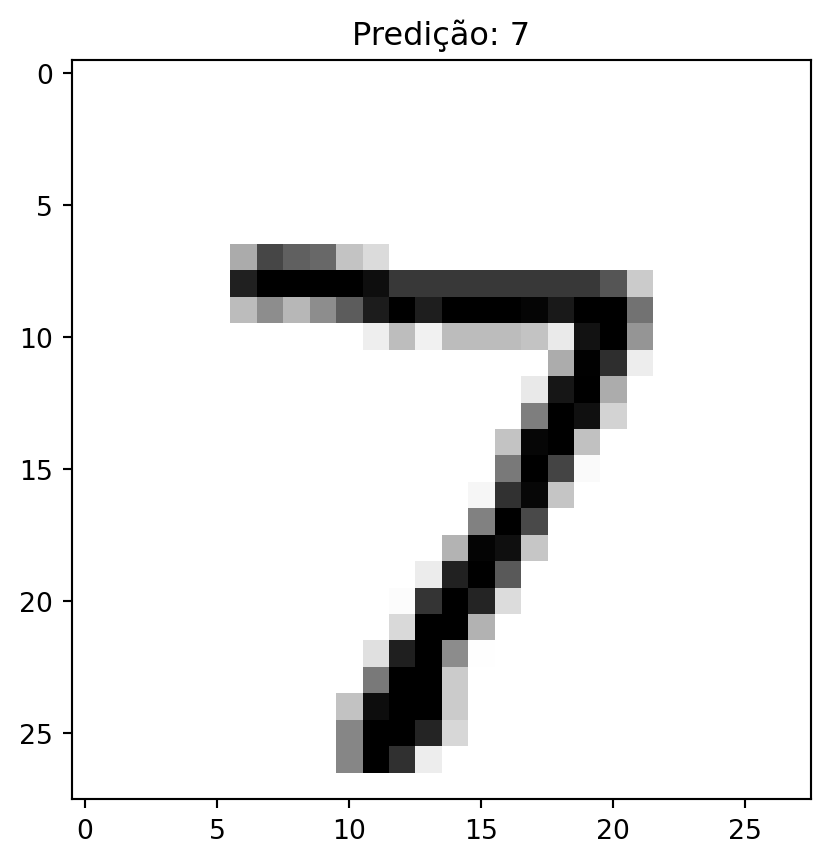

acertou
acertou
acertou
acertou
acertou
acertou
acertou
acertou
acertou
acertou


In [4]:
# 7. Exemplo de previsão
predictions = model.predict(x_test)
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.title(f'Predição: {np.argmax(predictions[0])}')
plt.show()

# 8. Visualizar erros do modelo
# 9. Sortear várias imagens aleatórias e verificar as predições
random_indices = random.sample(range(len(x_test)), 10)
predictions_list = [np.argmax(predictions[idx]) for idx in random_indices]
real_values_list = [y_test[idx] for idx in random_indices]

for i, idx in enumerate(random_indices):
    if predictions_list[i] == real_values_list[i]:
        print(f"acertou")
    else:
        print(f"errou")